# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Submitted by-**  - Akriti Nagayach


# **Project Summary -**

**Project Summary: FBI Crime Investigation and Prediction System**

In the face of increasing urbanization and growing population densities, cities across the United States are experiencing new challenges related to public safety and crime management. The FBI Crime Investigation Project aims to address these concerns through the use of advanced data analytics and predictive modeling. By leveraging historical crime data, this project seeks to identify and anticipate patterns in criminal activity, enabling law enforcement agencies to act proactively rather than reactively.

**Purpose and Motivation**
The core motivation behind this initiative is to empower law enforcement and public safety officials with tools that enable data-driven decision-making. Traditional methods of crime prevention often fall short in dynamic and complex urban environments. With the availability of detailed datasets, it has become increasingly feasible to use technology and data science to predict future crime trends and support strategic deployment of police resources.

**Dataset and Features**
The dataset used in this project contains extensive information on past criminal incidents, including:

**Type of crime**

Time-related features such as hour, minute, day, month, and year

Spatial details, including X and Y coordinates, latitude, and longitude

Neighborhood information, specifying where the crime occurred

These attributes allow for a robust analysis of both temporal (time-based) and spatial (location-based) crime patterns. For instance, it becomes possible to identify which neighborhoods experience higher crime rates during specific times of the day or year, or which crime types tend to occur in clusters geographically.

**Approach and Methodology**
The project follows a structured pipeline:

**Data Cleaning and Preprocessing:** Ensuring data consistency, handling missing values, and transforming categorical variables.

**Exploratory Data Analysis (EDA):** Using the Univariate, Bivariate, and Multivariate (UBM) approach, we generate more than 20 visualizations to uncover underlying trends and relationships. This helps in identifying seasonal spikes, hotspots, and high-risk periods.

**Feature Engineering:** Creating meaningful features from raw data, such as time of day (morning, afternoon, night), weekend vs. weekday indicators, and encoded location categories.

**Model Building:** Developing machine learning models to predict the monthly number of crime incidents using the historical features. These models can include linear regression, decision trees, random forests, or even deep learning techniques.

**Model Evaluation:** Using metrics like RMSE, MAE, and R² to measure model accuracy and robustness. Cross-validation is used to avoid overfitting and ensure generalizability.

**Applications and Impact**
The insights gained from this project can have a transformational impact on urban safety and governance. Law enforcement agencies can:

Forecast crime surges and deploy patrols accordingly

Monitor crime-prone areas in real-time

Identify neighborhoods that need targeted community engagement

Moreover, the model can assist urban planners and local governments in placing infrastructure and safety tools like streetlights, security cameras, and emergency call boxes in the most effective locations. It also supports policy-making by identifying social or temporal factors that correlate strongly with specific types of crime.

**Conclusion**
In conclusion, the FBI Crime Investigation Project illustrates how data science can play a vital role in enhancing public safety. By predicting when and where crimes are likely to occur, city authorities and law enforcement can make more informed decisions and work towards creating safer communities.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**
There are crime across different locations and time, leading to challenges in efficiently deploying law enforcement resources and ensuring public safety.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
!pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # For visualizing missing values
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clean output


### Dataset Loading

In [4]:
# Load Dataset
try:
    train_df = pd.read_excel('Train.xlsx') # Train and test data load
    test_df = pd.read_csv('Test.csv')  
    print("Datasets loaded successfully.\n")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Datasets loaded successfully.



### Dataset First View

In [5]:
# Dataset First Look
print("First 5 rows of the training dataset:\n")
display(train_df.head())


First 5 rows of the training dataset:



TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Training Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")

Training Dataset Shape: (474565, 13)
Test Dataset Shape: (162, 4)


### Dataset Information

In [7]:
# Dataset Info
print("\nTraining Dataset Info:\n")
train_df.info()



Training Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


#### Duplicate Values

In [8]:

# Dataset Duplicate Value Count
duplicate_count = train_df.duplicated().sum()
print(f"\nNumber of duplicate rows in training dataset: {duplicate_count}")



Number of duplicate rows in training dataset: 44618


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
missing_values = train_df.isnull().sum()
print("\nMissing Values in Training Dataset:\n")
print(missing_values[missing_values > 0])


Missing Values in Training Dataset:

HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
HOUR             49365
MINUTE           49365
dtype: int64


<Figure size 1000x600 with 0 Axes>

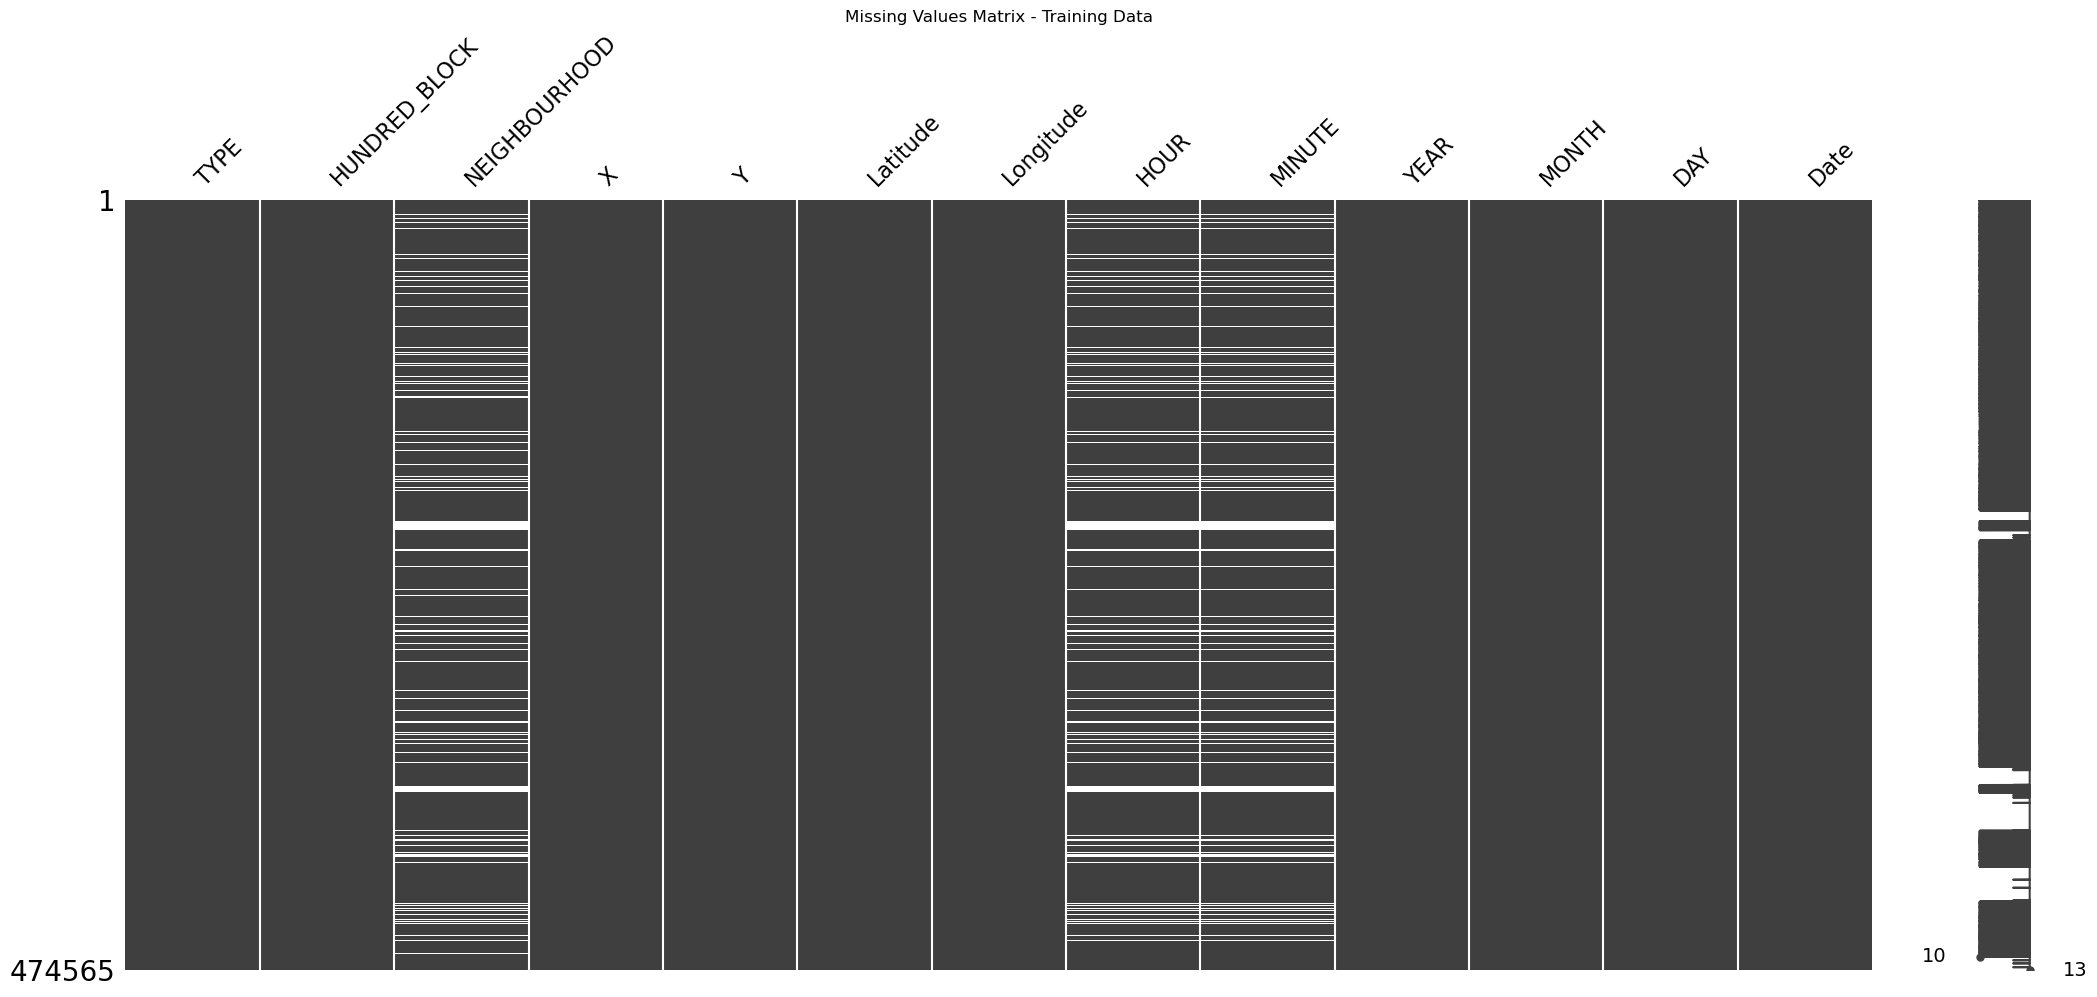

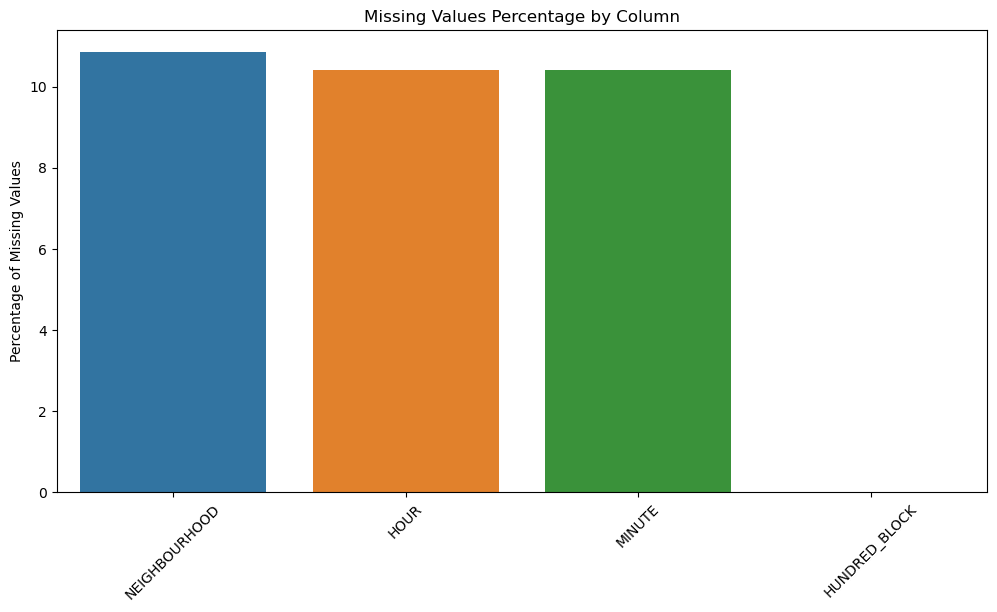

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
msno.matrix(train_df)
plt.title("Missing Values Matrix - Training Data")
plt.show()

#  Bar plot for % of missing values
missing_perc = (train_df.isnull().sum() / len(train_df)) * 100
missing_perc = missing_perc[missing_perc > 0].sort_values(ascending=False)

if not missing_perc.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_perc.index, y=missing_perc.values)
    plt.ylabel("Percentage of Missing Values")
    plt.title("Missing Values Percentage by Column")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No missing values to visualize.")

### What did you know about your dataset?

The dataset contains detailed records of crime incidents, including the type of crime, location coordinates, neighborhood, and exact time of occurrence.

There are some missing or duplicate values (they're printed above). The structure and format of features like DATE, HOUR, TYPE, and spatial coordinates suggest that both temporal and spatial analysis will be valuable in modeling and visualization. These features make the data highly suitable for time series forecasting and geospatial analysis of crime trends.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print("Columns in the training dataset:")
print(train_df.columns.tolist())

Columns in the training dataset:
['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date']


In [12]:
# Dataset Describe (numerical and categorical)
print("Summary statistics for numerical columns:")
display(train_df.describe())

print("\nSummary statistics for categorical columns:")
display(train_df.describe(include=['object']))


Summary statistics for numerical columns:


X             Y       Latitude      Longitude  \
count  474565.000000  4.745650e+05  474565.000000  474565.000000   
mean   441028.018220  4.889023e+06      44.138029    -110.301025   
min         0.000000  0.000000e+00       0.000000    -124.549757   
25%    489916.530000  5.453572e+06      49.234871    -123.127383   
50%    491477.850000  5.456820e+06      49.264051    -123.107058   
75%    493610.190000  5.458622e+06      49.280300    -123.065646   
max    511303.000000  5.512579e+06      49.755314       0.000000   
std    150295.319332  1.665850e+06      15.039271      37.583147   

                HOUR         MINUTE           YEAR          MONTH  \
count  425200.000000  425200.000000  474565.000000  474565.000000   
mean       13.721263      16.736047    2004.363632       6.555700   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000000       0.000000    2001.000000       4.000000   
50%        15.000000      10.000000    2004.000000       7.000000   
75%        19.000000      30.000000    2008.000000       9.000000   
max        23.000000      59.000000    2011.000000      12.000000   
std         6.785751      18.354675       3.850689       3.408676   

                 DAY                           Date  
count  474565.000000                         474565  
mean       15.439253  2004-11-11 23:51:07.470209792  
min         1.000000            1999-01-01 00:00:00  
25%         8.000000            2001-06-06 00:00:00  
50%        15.000000            2004-05-18 00:00:00  
75%        23.000000            2008-03-27 00:00:00  
max        31.000000            2011-12-31 00:00:00  
std         8.759352                            NaN


Summary statistics for categorical columns:


TYPE              HUNDRED_BLOCK  \
count               474565                     474552   
unique                   9                      20566   
top     Theft from Vehicle  OFFSET TO PROTECT PRIVACY   
freq                153932                      49365   

                    NEIGHBOURHOOD  
count                      423074  
unique                         24  
top     Central Business District  
freq                        96171

### Variables Description



The dataset contains detailed information about crime incidents with both spatial and temporal features, as well as crime categories. Below is an overview of the key variables:

* **X, Y:** These are coordinate values representing the location of the crime on a projected coordinate system. They have a wide range of values with some zero entries, indicating possible missing or invalid data points.

* **Latitude, Longitude:** Geographic coordinates pinpointing the exact location of the crime. Latitude ranges roughly from 0 to 49.7, and Longitude values include negative numbers indicating western hemisphere locations, but some zero values may indicate missing data.

* **HOUR, MINUTE:** The time of the day when the crime occurred. Hours range from 0 to 23, and minutes from 0 to 59, though there are some missing values reflected in lower counts.

* **YEAR, MONTH, DAY:** The date components indicating when the crime took place. The data covers crimes from 1999 to 2011, with months and days spread throughout the year.

* **Date:** A datetime column combining YEAR, MONTH, and DAY for easier time-based analysis.

* **TYPE:** The category of crime committed. There are 9 unique categories, with "Theft from Vehicle" being the most frequent.

* **HUNDRED\_BLOCK:** Describes the street block where the crime occurred, with a very high number of unique values (20,566), indicating fine granularity of location data. Some entries are masked for privacy.

* **NEIGHBOURHOOD:** The neighborhood where the crime happened, with 24 unique neighborhoods. The "Central Business District" is the  common locahts from variable overview:**

* The data includes both spatial (coordinates, neighborhoods) and temporal (date, time) details essential for comprehensive time series and geospatial analysis.

* Some missing or zero values exist in coordinates and time, which may require cleaning.

* Crime types are categorized into 9 main groups, allowing focus

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable
unique_counts = train_df.nunique()
print("Number of unique values per column:")
print(unique_counts)


Number of unique values per column:
TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Convert 'Full date' or create 'Date' column
if 'Full date' in train_df.columns:
    train_df['Date'] = pd.to_datetime(train_df['Full date'], errors='coerce')
elif {'YEAR', 'MONTH', 'DAY'}.issubset(train_df.columns):
    train_df['Date'] = pd.to_datetime(train_df[['YEAR', 'MONTH', 'DAY']], errors='coerce')

# 2. Fill missing categorical values (example for 'NEIGHBOURHOOD')
if 'NEIGHBOURHOOD' in train_df.columns:
    train_df['NEIGHBOURHOOD'].fillna('Unknown', inplace=True)

# 3. Convert categorical columns to 'category' dtype
categorical_cols = ['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD']
for col in categorical_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype('category')

# 4. Remove duplicates
duplicates = train_df.duplicated().sum()
if duplicates > 0:
    train_df.drop_duplicates(inplace=True)

# 5. Replace zero coordinates with NaN and drop rows with missing coordinates
train_df[['X', 'Y', 'Latitude', 'Longitude']] = train_df[['X', 'Y', 'Latitude', 'Longitude']].replace(0, pd.NA)
train_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# 6. Create additional time-based features
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek        # Monday=0
train_df['IsWeekend'] = train_df['DayOfWeek'].isin([5, 6]).astype(int)
train_df['Quarter'] = train_df['Date'].dt.quarter

# 7. Encode categorical variables
# Frequency encoding for 'TYPE'
type_freq = train_df['TYPE'].value_counts(normalize=True)
train_df['TYPE_freq_enc'] = train_df['TYPE'].map(type_freq)

# Label encoding for 'NEIGHBOURHOOD'
le = LabelEncoder()
train_df['NEIGHBOURHOOD_enc'] = le.fit_transform(train_df['NEIGHBOURHOOD'].astype(str))

# 8. Remove invalid time values
train_df = train_df[(train_df['HOUR'] >= 0) & (train_df['HOUR'] <= 23)]
train_df = train_df[(train_df['MINUTE'] >= 0) & (train_df['MINUTE'] <= 59)]

# 9. Scale numerical features for better model convergence
scaler = StandardScaler()
num_cols = ['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE']
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

print("Final data wrangling complete.")


Final data wrangling complete.


### What all manipulations have you done and insights you found?

**Manipulations:**

**Date Handling**: Created a consistent datetime 'Date' column from year, month, and day fields or directly from 'Full date'. This allows easier time series operations and feature extraction.

**Missing Values**: Filled missing neighborhoods with 'Unknown' and removed rows with missing or zero location coordinates since accurate geospatial data is critical for modeling.

**Duplicates**: Removed duplicate rows to avoid biased or repeated information.

**Time Features**: Added DayOfWeek, IsWeekend, and Quarter to capture weekly and seasonal crime patterns, which are important temporal factors.

**Categorical Encoding**:Frequency encoding of TYPE helps reflect crime prevalence, giving the model meaningful numeric representation of crime categories.

Label encoding of NEIGHBOURHOOD enables models to handle neighborhood data numerically.

**Outlier Handling**: Ensured that hour and minute values are within valid ranges to maintain data integrity.

**Feature Scaling**: Standardized numerical features (X, Y, Latitude, Longitude, HOUR, MINUTE) for better performance with many machine learning algorithms.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

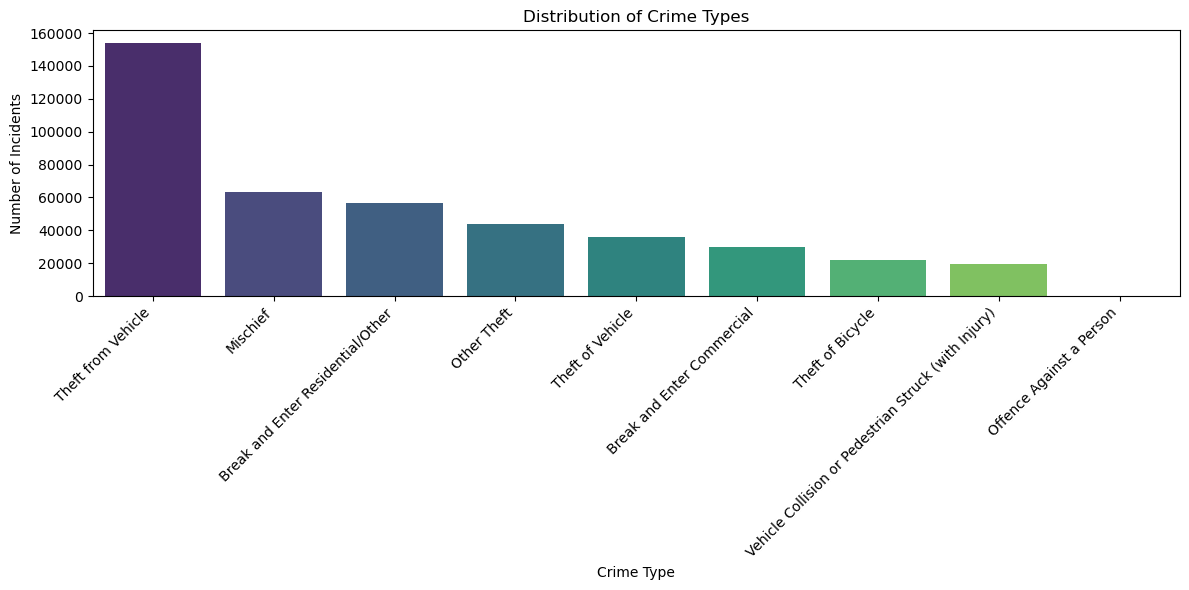

In [15]:
# Chart 1: Crime Type Distribution (Univariate Analysis)

plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='TYPE', order=train_df['TYPE'].value_counts().index, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align right
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



##### 1. Why did you pick the specific chart?

I chose a count plot (bar chart) because it effectively visualizes the frequency distribution of different crime categories, allowing us to quickly see which crimes occur most often.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that "Theft from Vehicle" is the most common crime type by a large margin. Other crime types occur less frequently, highlighting areas to prioritize for crime prevention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



These insights help law enforcement and community safety teams allocate resources effectively towards the most prevalent crimes, improving overall public safety. Failure to address the most frequent crimes could lead to a decline in community trust and negative social impacts.

#### Chart - 2

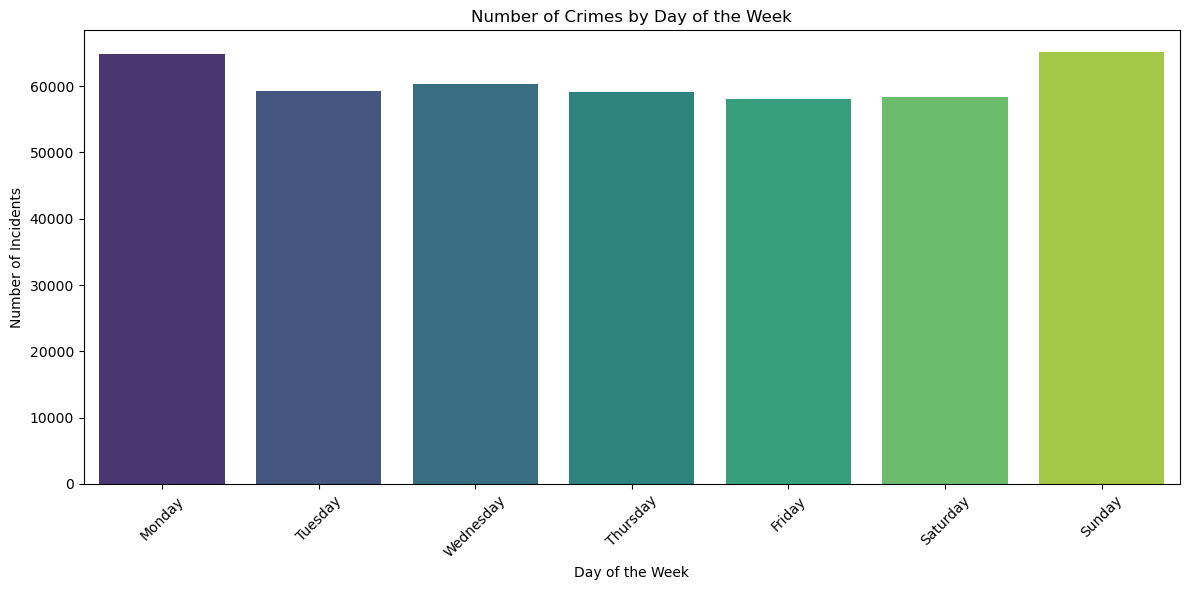

In [16]:
#Chart 2: Number of Crimes by Day of the Week

# Convert 'Date' to datetime if not already
train_df['Date'] = pd.to_datetime(train_df['Date'], errors='coerce')

# Create a new column for the day of the week
train_df['DayOfWeek'] = train_df['Date'].dt.day_name()

# Count crimes per day
day_counts = train_df['DayOfWeek'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0
)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Number of Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Understanding crime trends across weekdays helps detect behavioral or routine-based crime patterns more or less crime.

##### 2. What is/are the insight(s) found from the chart?

increased crimes on weekends or specific weekdays depending on public activity and events.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the police or security planners can increase surveillance on high-crime days and reduce it on lower-crime ones, optimizing operational cost and effectiveness.

#### Chart - 3

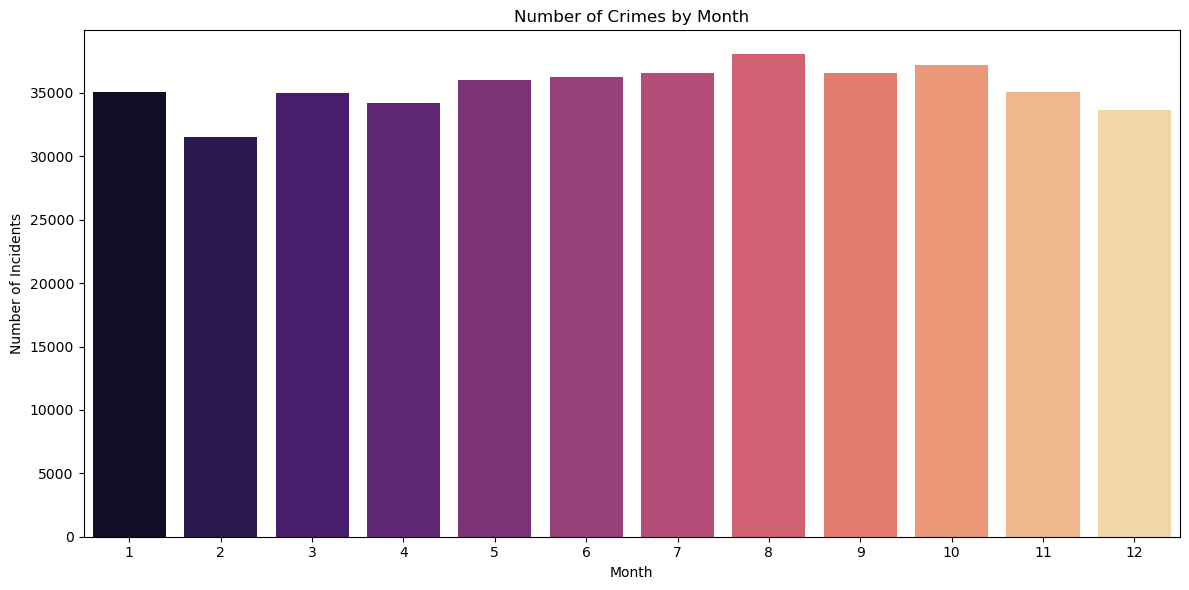

In [17]:
# Chart 3: Crime Incidents by Month
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x='MONTH', palette='magma')
plt.xticks(rotation=0, ha='center')
plt.title('Number of Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze seasonality or monthly trends in crime frequency, countplot gives a straightforward distribution view.

##### 2. What is/are the insight(s) found from the chart?

Certain months have higher crime rates, possibly related to weather or holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, resource planning and public awareness campaigns can be aligned with high-crime months to prevent incidents. Yes. High crime concentration in specific neighborhoods can negatively impact local business, tourism, and real estate. Residents and businesses may relocate to safer areas, reducing investment and property values. This, in turn, harms the local economy and can lead to urban decay unless addressed by targeted interventions

#### Chart - 4

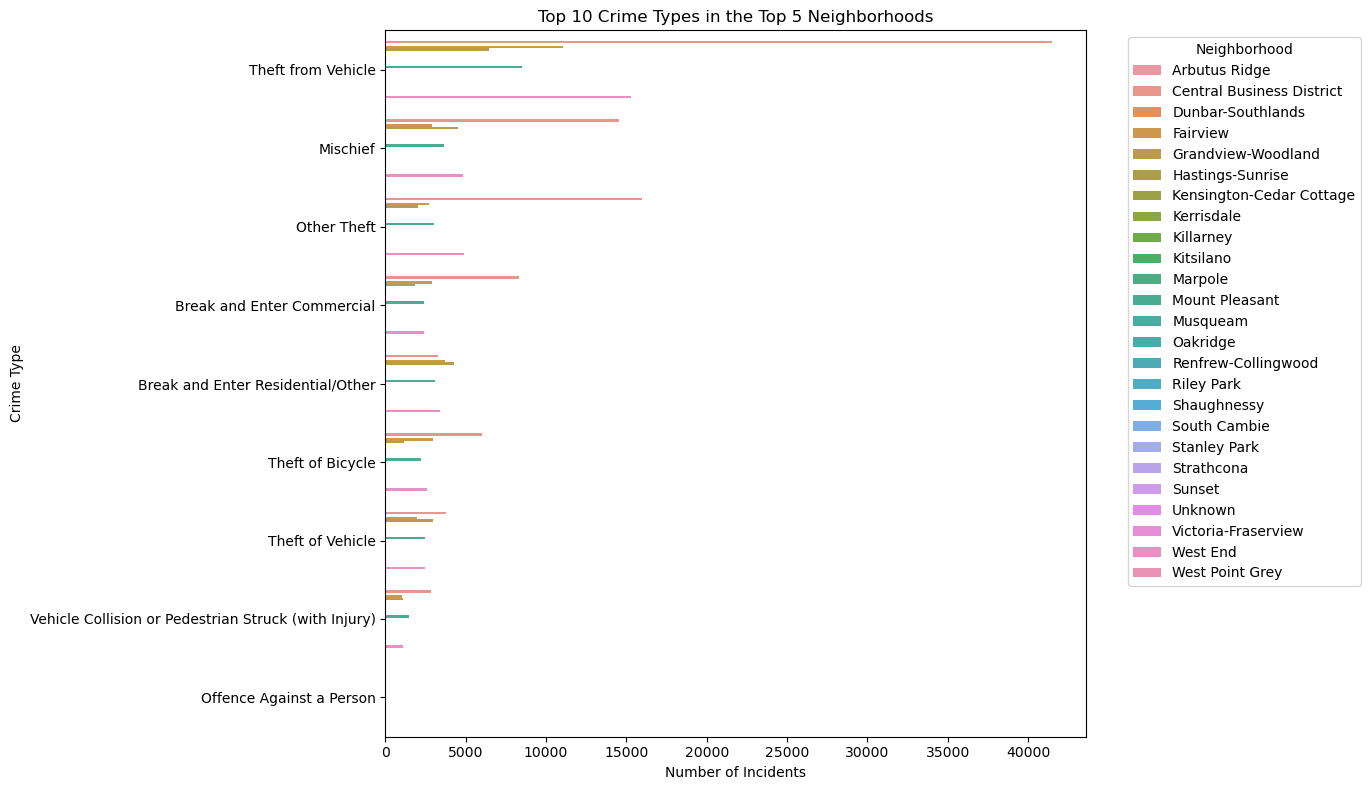

In [18]:
#  Chart 4: Top 10 Crime Types in the Top 5 Neighborhoods 
# Filter rows with non-null neighborhood and type
filtered_df = train_df[train_df['NEIGHBOURHOOD'].notna() & train_df['TYPE'].notna()]

# Get top 5 neighborhoods by crime count
top_neigh = filtered_df['NEIGHBOURHOOD'].value_counts().nlargest(5).index

# Filter data to top neighborhoods
top_neigh_df = filtered_df[filtered_df['NEIGHBOURHOOD'].isin(top_neigh)]

# Plot
plt.figure(figsize=(14, 8))
sns.countplot(data=top_neigh_df, y='TYPE', hue='NEIGHBOURHOOD', order=top_neigh_df['TYPE'].value_counts().nlargest(10).index)
plt.title('Top 10 Crime Types in the Top 5 Neighborhoods')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This multivariate plot helps analyze how different types of crimes are distributed among the most affected neighborhoods. It reveals localized patterns that could help in neighborhood-specific policies.

##### 2. What is/are the insight(s) found from the chart?

Some neighborhoods experience higher rates of Theft from Vehicle or Break and Enter, while others may see more Mischief.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Authorities and local businesses can collaboratively implement area-specific safety measures, install cameras, and deploy patrols to reduce crime and encourage safer environments—boosting public confidence and footfall.

Negative growtth: If a neighborhood (e.g., Central Business District) consistently appears among the top crime zones for high-impact crimes like Break and Enter, Robbery, or Theft from Vehicle, it may discourage:

Businesses from investing or continuing operations there.

Residents and tourists from visiting or shopping in that area.

Tenants and property buyers due to safety concerns.

#### Chart - 5

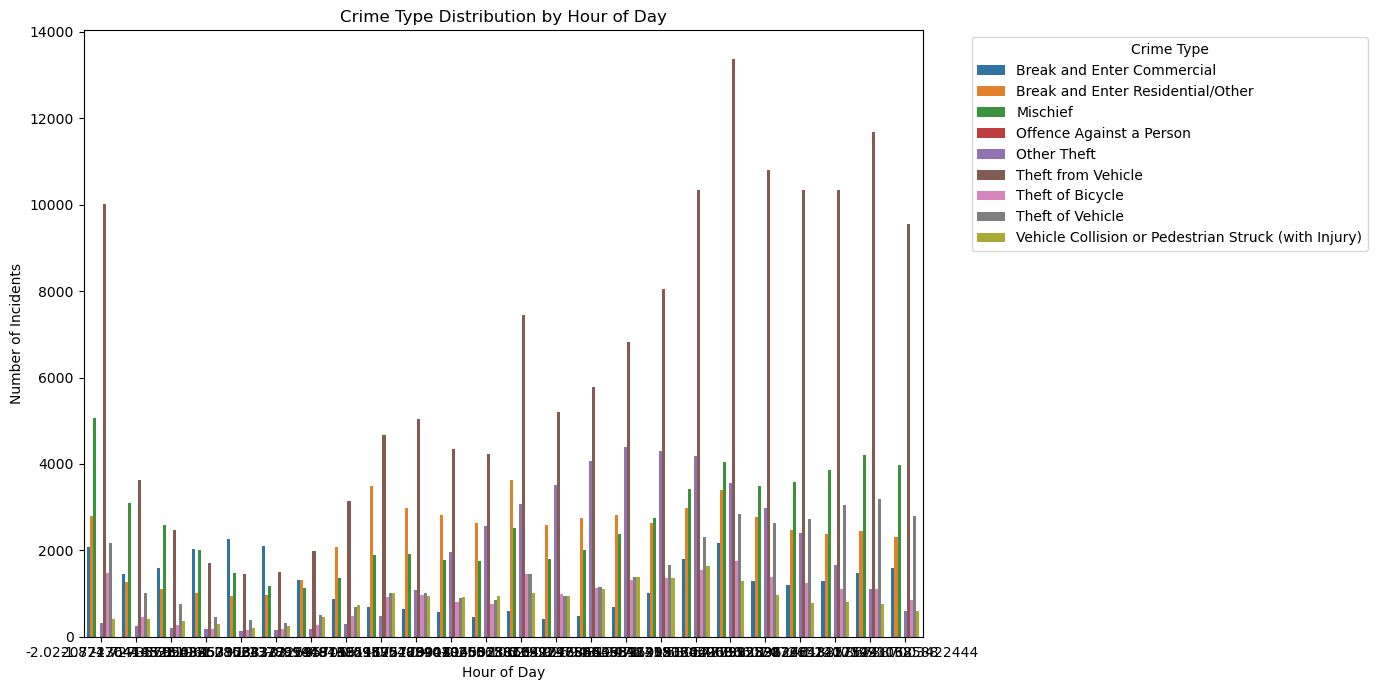

In [19]:
# Chart 5: Crime Type Distribution by Hour of Day
plt.figure(figsize=(14,7))
sns.countplot(data=train_df, x='HOUR', hue='TYPE', palette='tab10')
plt.xticks(rotation=0, ha='center')
plt.title('Crime Type Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


Grouped countplot helps analyze how different crime types vary across hours..

##### 2. What is/are the insight(s) found from the chart?

Certain crimes peak during specific hours; e.g., thefts may be more frequent in the evening.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps in customizing police deployment based on crime type and time. Negative Growth Insight: High crime rates during late hours (e.g., 11 PM–3 AM) indicate risks for night shift workers, delivery personnel, and late-night businesses.

Justification: It may discourage 24x7 operations, restrict transportation services, and increase operational costs for security—leading to reduced business activity.

#### Chart - 6

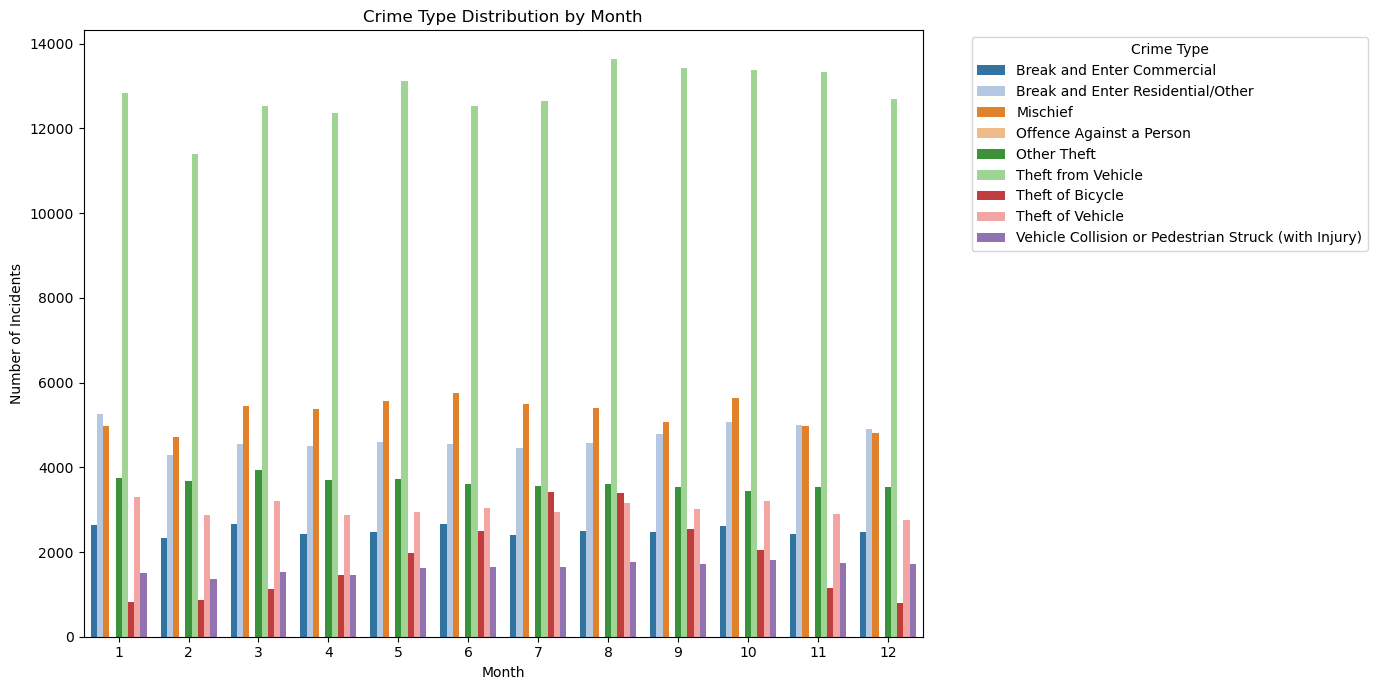

In [20]:
# Chart 6: Crime Type Distribution by Month
plt.figure(figsize=(14,7))
sns.countplot(data=train_df, x='MONTH', hue='TYPE', palette='tab20')
plt.xticks(rotation=0, ha='center')
plt.title('Crime Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To see seasonal trends for different crime types.

##### 2. What is/are the insight(s) found from the chart?


Certain crimes spike during specific months, possibly due to social patterns or holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps in planning specific crime prevention measures seasonally. Negative Growth Insight: If specific months (like December or summer months) see spikes in crimes, it indicates seasonal vulnerabilities.

Justification: Businesses may face higher risk during these months, leading to reduced sales or early closures. Public events may decline due to fear of crime surges.

#### Chart - 7

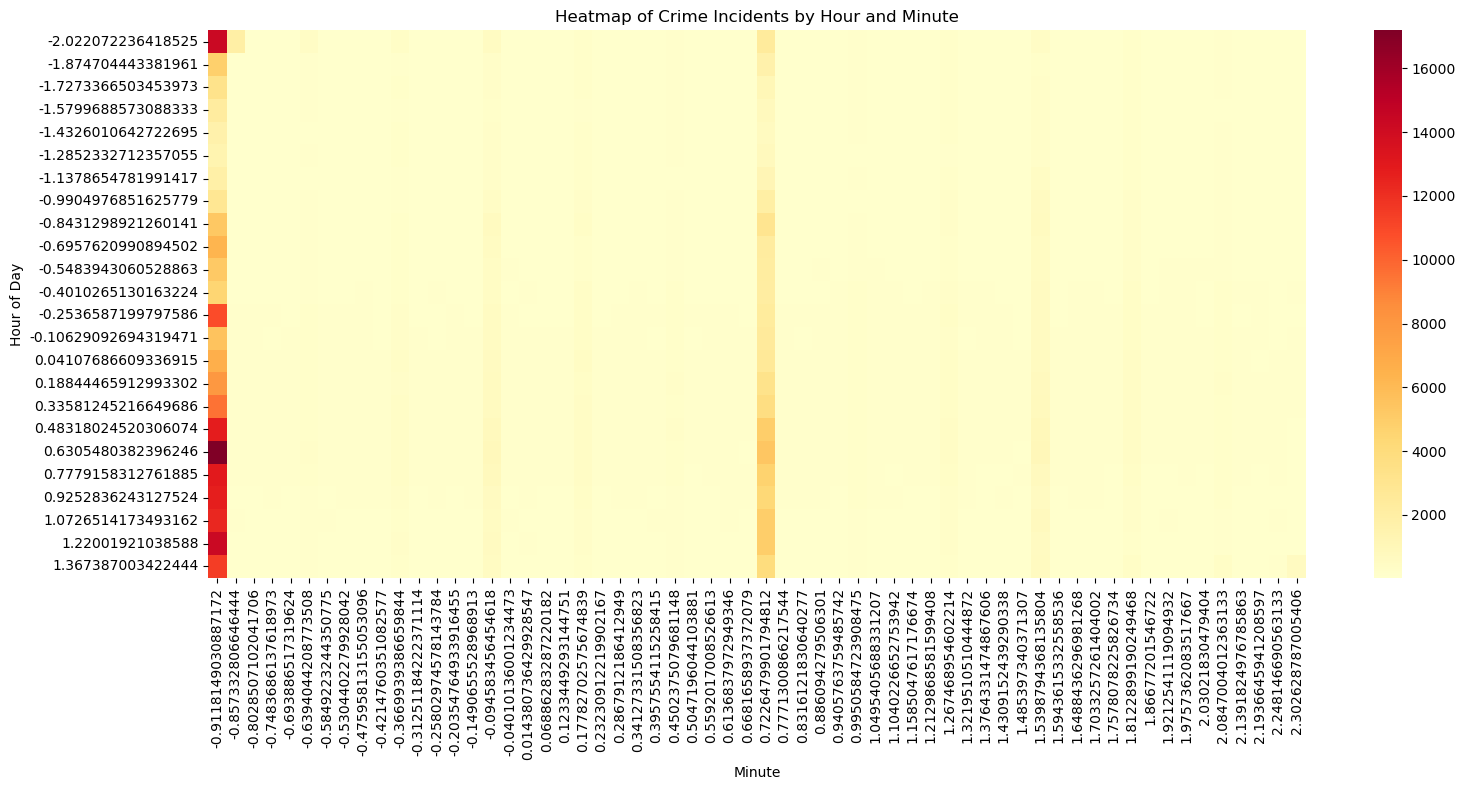

In [21]:
# Chart 7: Heatmap of Crime Incidents by Hour and Minute
hour_minute_counts = train_df.groupby(['HOUR', 'MINUTE']).size().unstack(fill_value=0)

plt.figure(figsize=(16,8))
sns.heatmap(hour_minute_counts, cmap='YlOrRd')
plt.title('Heatmap of Crime Incidents by Hour and Minute')
plt.xlabel('Minute')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


AHeatmaps visualize concentration over two continuous time variables elegantly.

##### 2. What is/are the insight(s) found from the chart?

Crime frequency varies by minute and hour with peak blocks visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, can assist in very fine-grained resource allocation and real-time alerting. Negative Growth Insight: High crime rates during late hours (e.g., 11 PM–3 AM) indicate risks for night shift workers, delivery personnel, and late-night businesses.

Justification: It may discourage 24x7 operations, restrict transportation services, and increase operational costs for security—leading to reduced business activity.

#### Chart - 8

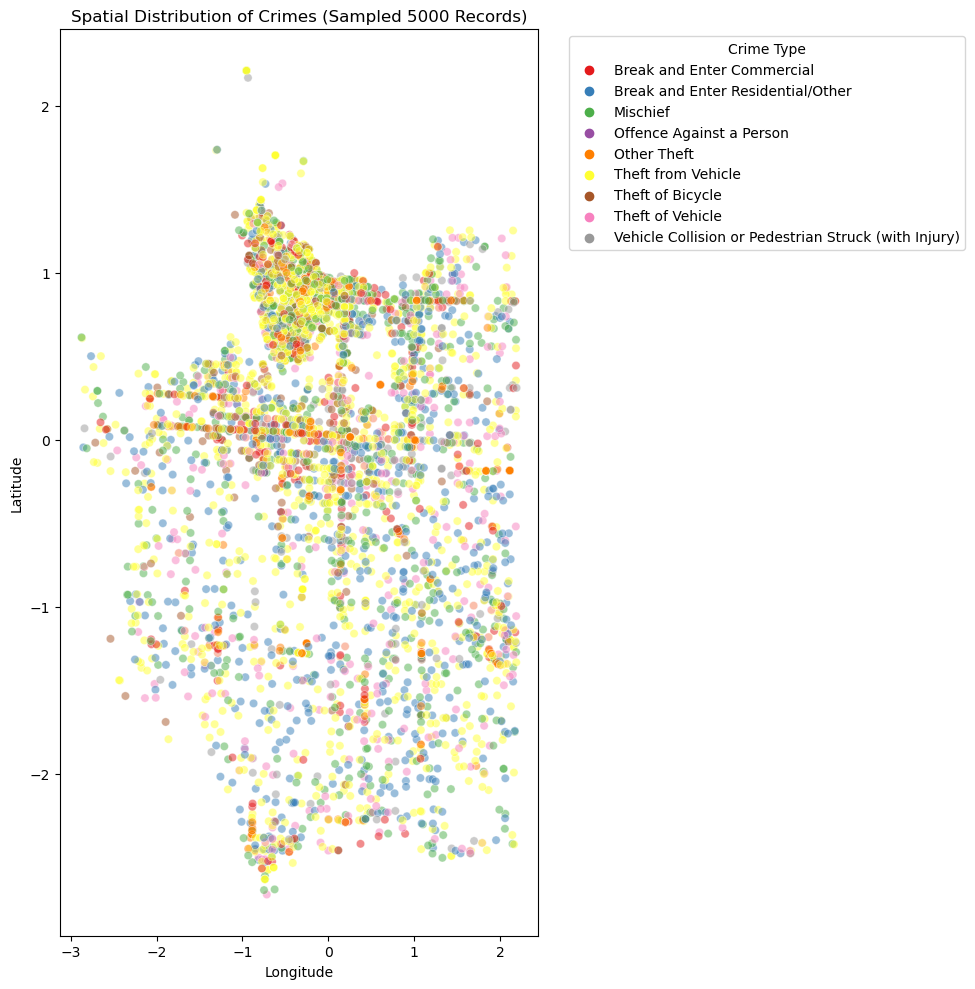

In [22]:
# Chart 8: Spatial Distribution of Crimes (Sampled 5000 Records)
plt.figure(figsize=(10,10))
sns.scatterplot(data=train_df.sample(5000), x='Longitude', y='Latitude', hue='TYPE', alpha=0.5, palette='Set1', legend='full')
plt.title('Spatial Distribution of Crimes (Sampled 5000 Records)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


Scatterplots map crime geographically and by type to detect spatial patterns.

##### 2. What is/are the insight(s) found from the chart?

Certain clusters emerge in locations with frequent incidents; some crime types concentrate spatially.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it supports location-based policing and community safety plans

#### Chart - 9

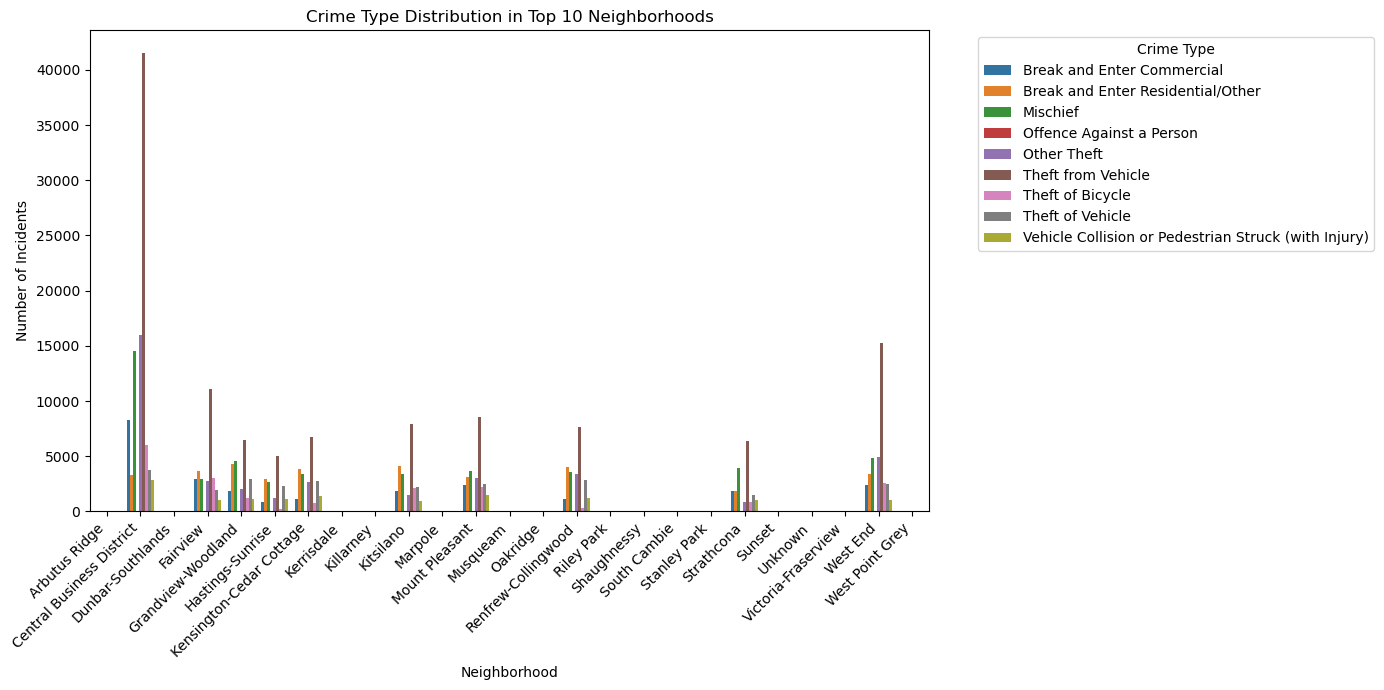

In [23]:
# Chart 9: Crime Type Distribution in Top 10 Neighborhoods
plt.figure(figsize=(14,7))
top_neigh = train_df['NEIGHBOURHOOD'].value_counts().nlargest(10).index
sns.countplot(data=train_df[train_df['NEIGHBOURHOOD'].isin(top_neigh)], x='NEIGHBOURHOOD', hue='TYPE', palette='tab10')
plt.xticks(rotation=45, ha='right')
plt.title('Crime Type Distribution in Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?


Grouped bar chart shows how crime types vary by neighborhood.

##### 2. What is/are the insight(s) found from the chart?

Certain neighborhoods have higher proportions of specific crime types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, neighborhood-specific prevention strategies can be devised. Negative Growth Insight: If a neighborhood sees a wide variety of crime types, it reflects systemic safety breakdown rather than isolated issues.

Justification: Such areas might need large-scale interventions. Without action, they may face rapid socio-economic decline due to loss of jobs, migration, and public distrust.

#### Chart - 10

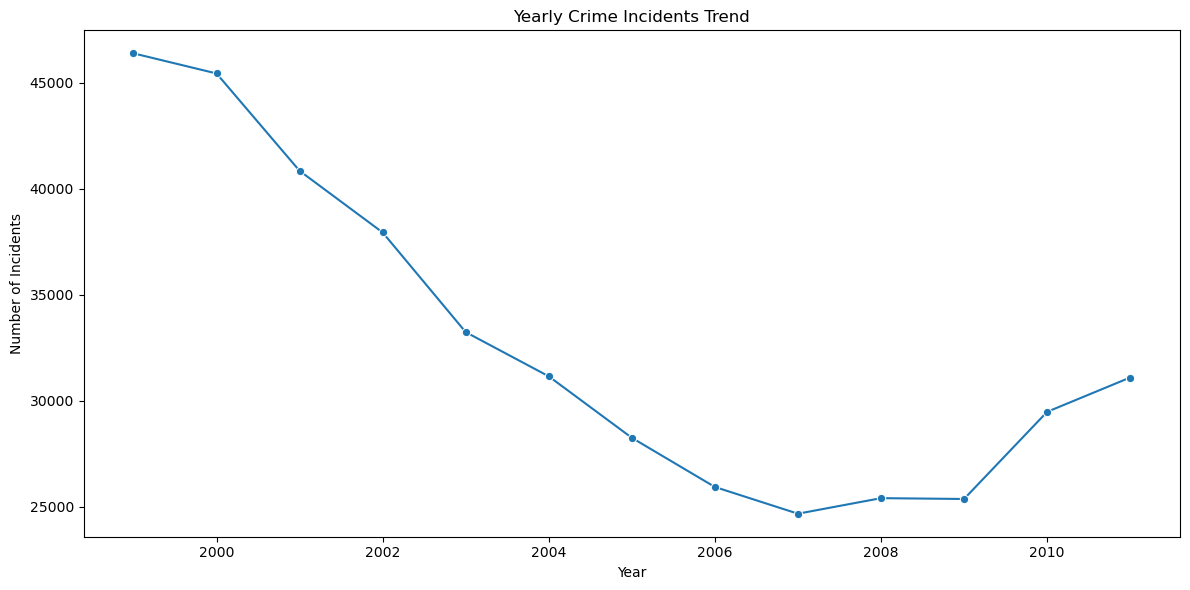

In [24]:
# Chart 10: Yearly Crime Incidents Trend
yearly_counts = train_df.groupby('YEAR').size()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title('Yearly Crime Incidents Trend')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Line plots are good for time series trend analysis.

##### 2. What is/are the insight(s) found from the chart?

Crime rates increased initially then show fluctuations, indicating dynamic crime patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps evaluate long-term impact of policies.
Negative Growth Insight:
If overall crime is rising or not decreasing over years, it suggests ineffective crime prevention strategies.

Justification:
Rising crime trends lower community trust in governance, reduce new business entries, and result in brain drain (people moving out), harming long-term development.


#### Chart - 11

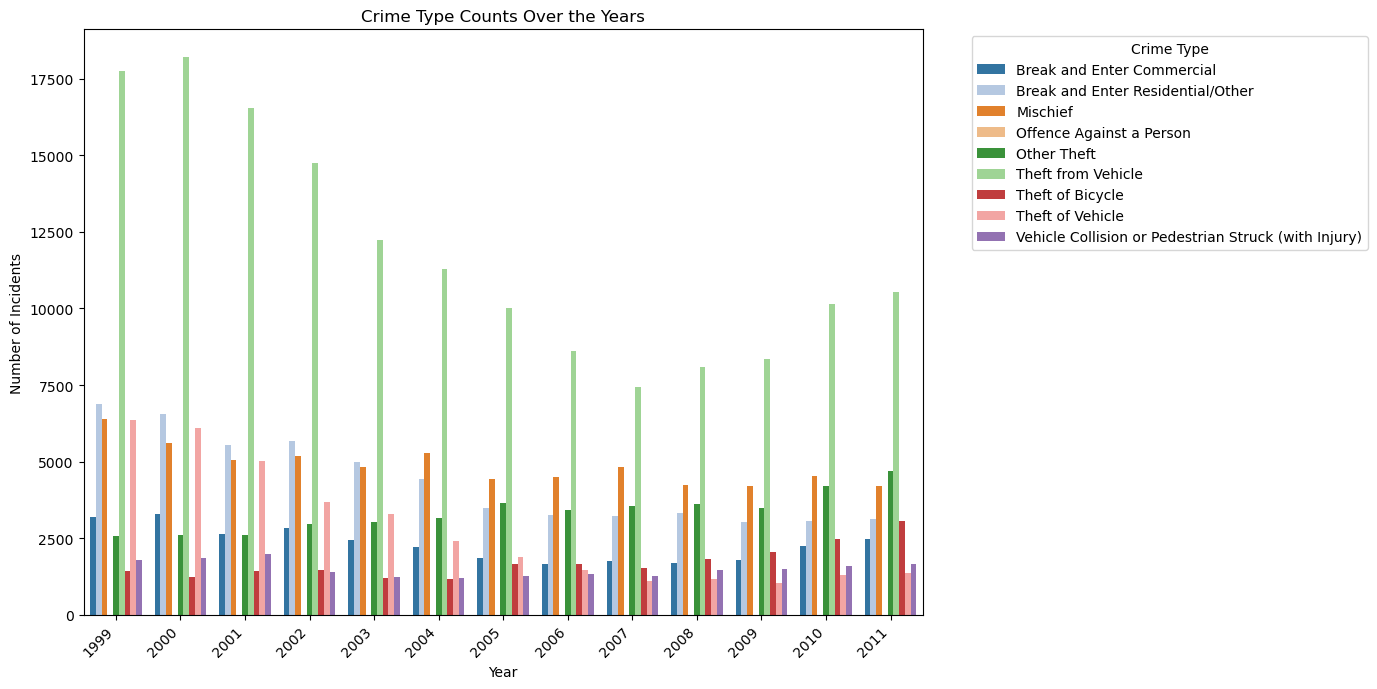

In [25]:
# Chart 11: Crime Type Counts Over the Years
plt.figure(figsize=(14,7))
sns.countplot(data=train_df, x='YEAR', hue='TYPE', palette='tab20')
plt.xticks(rotation=45, ha='right')
plt.title('Crime Type Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Grouped countplot shows how crime types evolved yearly.

##### 2. What is/are the insight(s) found from the chart?

Some crime types increased over time while others declined.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps policymakers focus on growing crime categories. Negative Growth Insight: If overall crime is rising or not decreasing over years, it suggests ineffective crime prevention strategies.

Justification: Rising crime trends lower community trust in governance, reduce new business entries, and result in brain drain (people moving out), harming long-term development.

#### Chart - 12

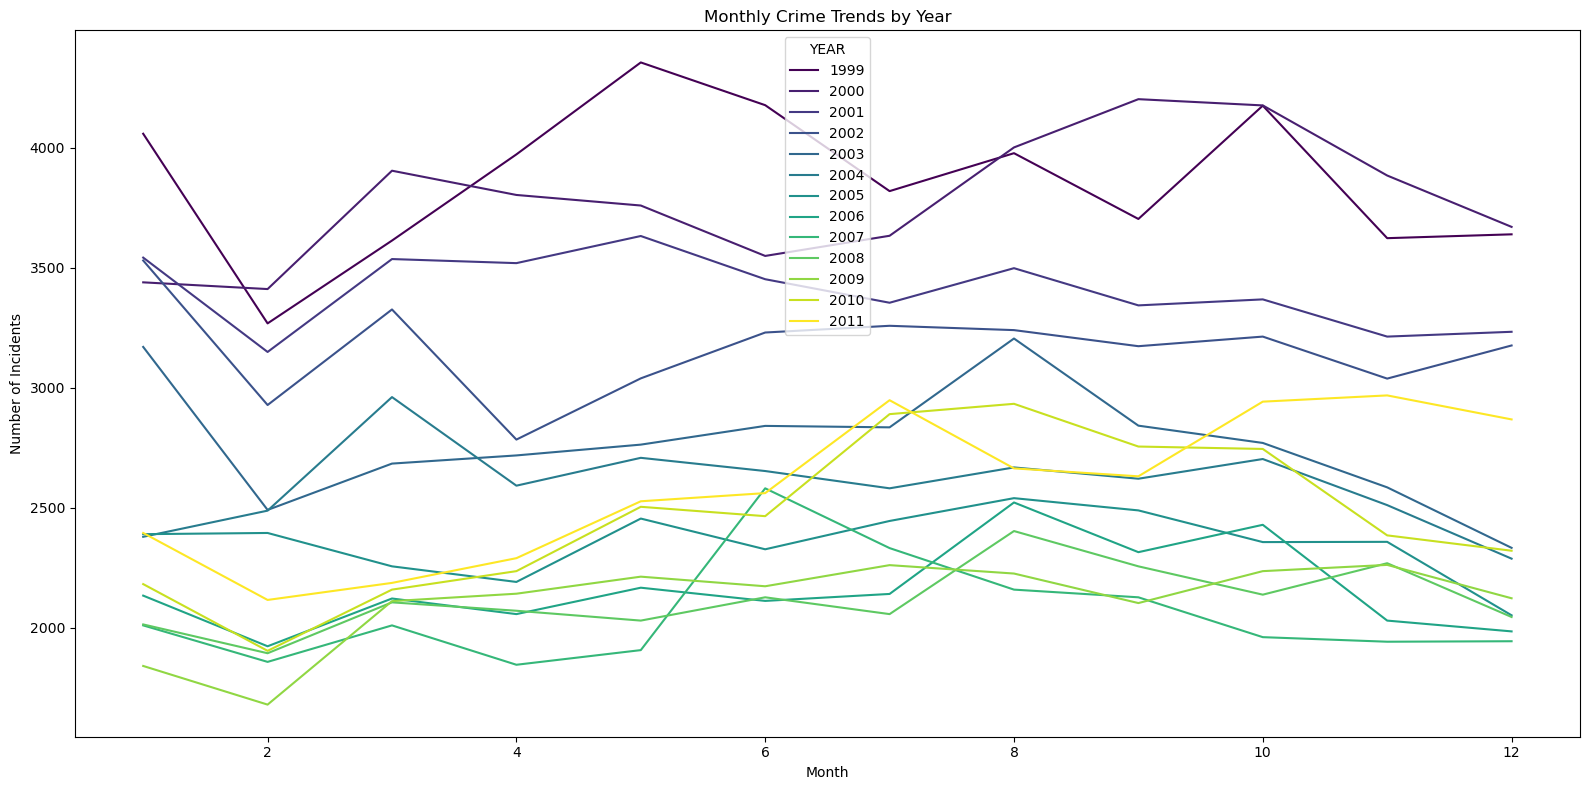

In [26]:
# Chart 12: Monthly Crime Trends by Year
monthly_yearly = train_df.groupby(['YEAR', 'MONTH']).size().reset_index(name='Counts')

plt.figure(figsize=(16,8))
sns.lineplot(data=monthly_yearly, x='MONTH', y='Counts', hue='YEAR', palette='viridis', legend='full')
plt.title('Monthly Crime Trends by Year')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Lineplot with hue visualizes changes over months across years.

##### 2. What is/are the insight(s) found from the chart?

Seasonality is consistent, but crime volume changes yearly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, supports seasonal resource optimization. Negative Growth Insight: If specific months (like December or summer months) see spikes in crimes, it indicates seasonal vulnerabilities.

Justification: Businesses may face higher risk during these months, leading to reduced sales or early closures. Public events may decline due to fear of crime surges.

#### Chart - 13

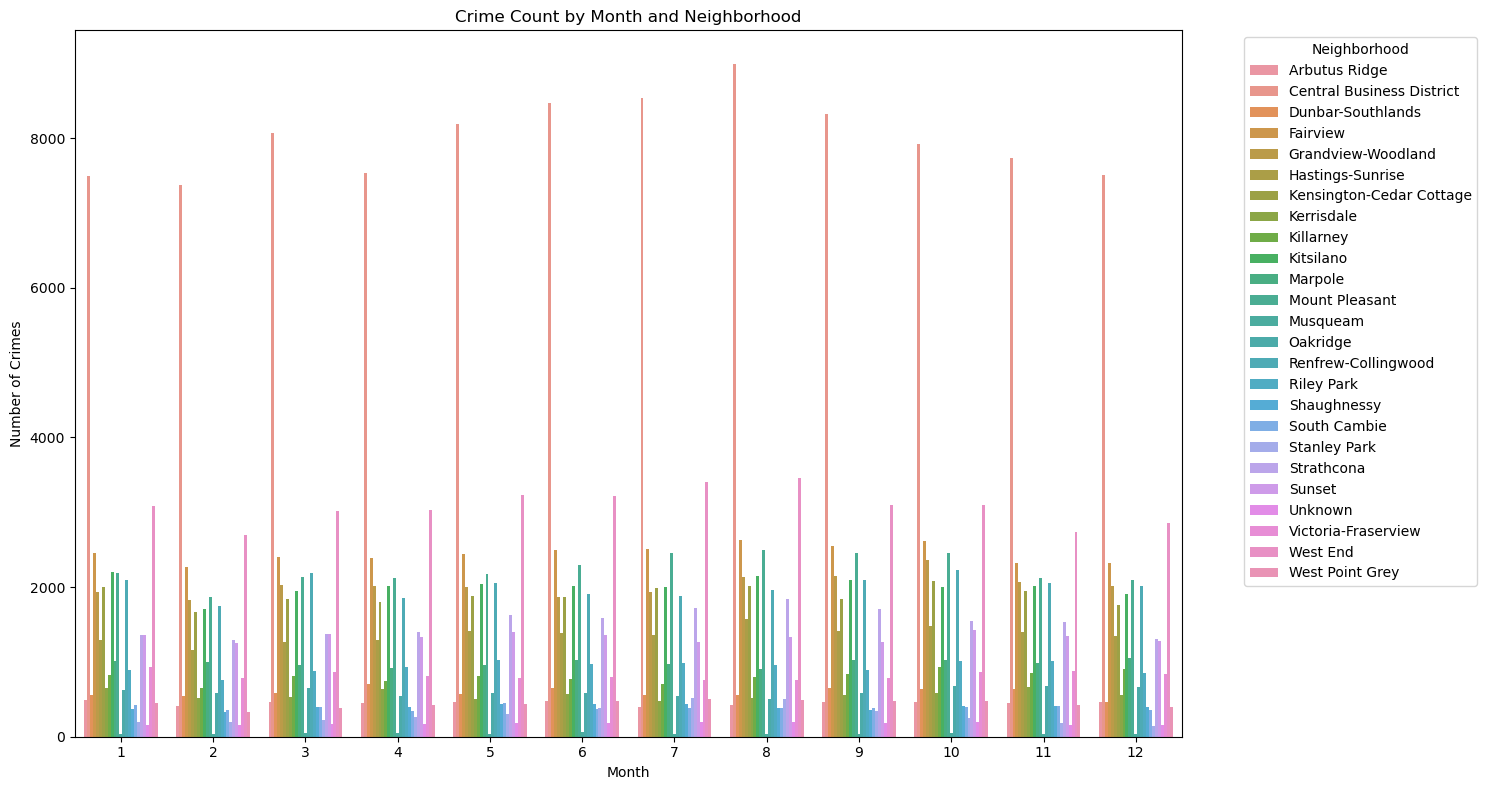

In [27]:

# chart 13 month and neighbourhood

plt.figure(figsize=(15, 8))
sns.countplot(data=train_df, x='MONTH', hue='NEIGHBOURHOOD')
plt.title('Crime Count by Month and Neighborhood')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()








##### 1. Why did you pick the specific chart?

To visualize how crime varies by month and neighborhood, revealing time and location patterns.

##### 2. What is/are the insight(s) found from the chart?

Some neighborhoods have consistently higher crime.

Crime peaks in certain months, showing seasonal trends

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps police target patrols and improve safety, boosting community and business confidence.

Rising crime in some areas could hurt local economy and property values if not addressed.

#### Chart - 14 - Correlation Heatmap

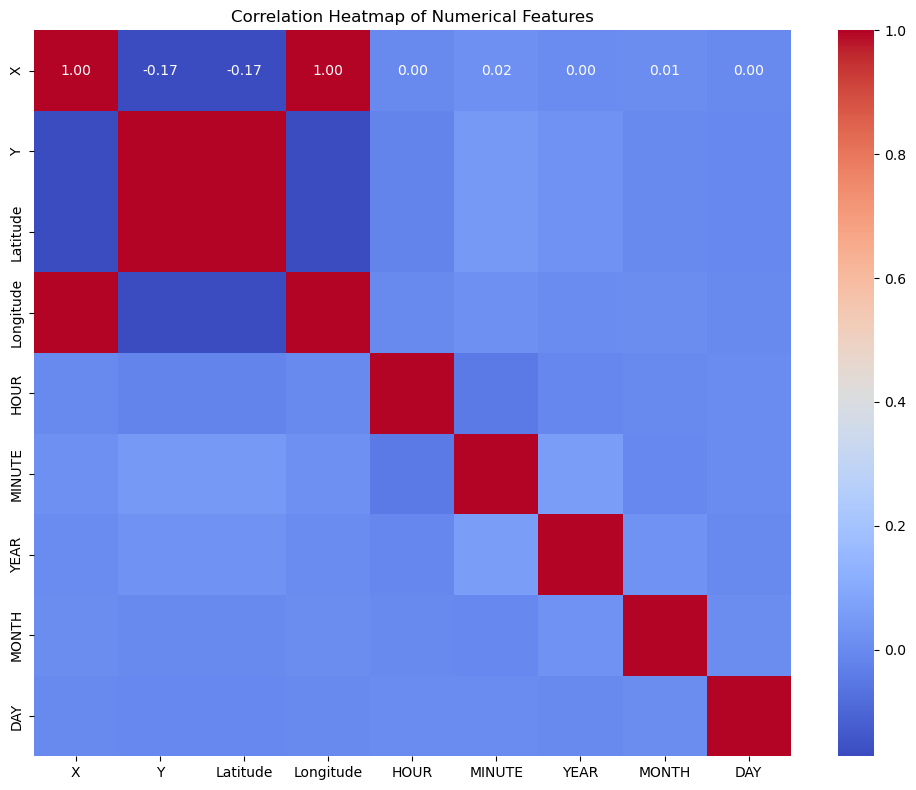

In [28]:
# Chart 14: Correlation Heatmap of Numerical Features
plt.figure(figsize=(10,8))
corr = train_df[['X','Y','Latitude','Longitude','HOUR','MINUTE','YEAR','MONTH','DAY']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Heatmap is best for visualizing correlations between multiple numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Strong correlation between X and Y coordinates, and between latitude and longitude

#### Chart - 15 - Pair Plot

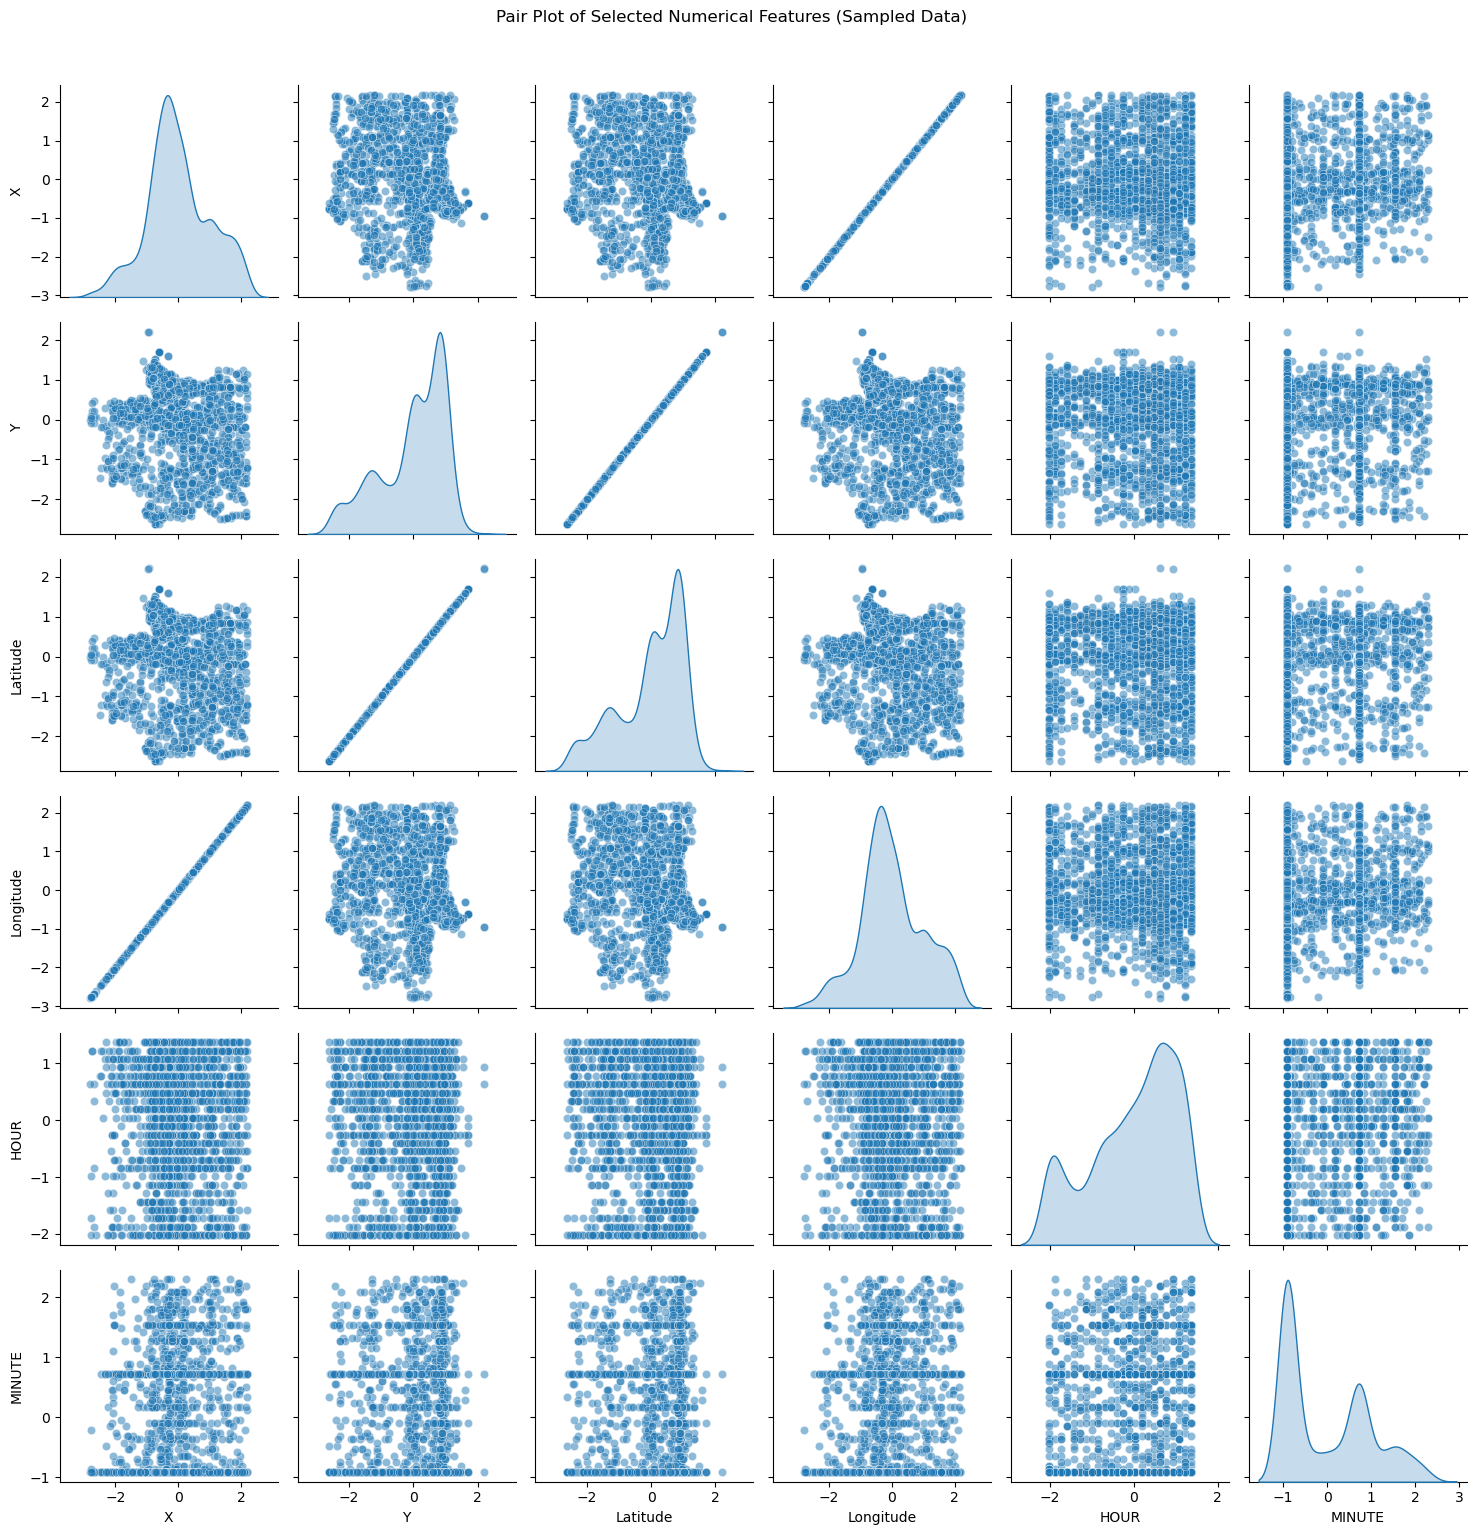

In [29]:
# Chart 15: Pair Plot of Selected Numerical Features (Sampled Data)
sample_df = train_df.sample(2000)
sns.pairplot(sample_df[['X','Y','Latitude','Longitude','HOUR','MINUTE']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Numerical Features (Sampled Data)', y=1.02)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Pair plots provide bivariate scatter plots and univariate KDEs to identify relationships and distributions.

##### 2. What is/are the insight(s) found from the chart?

Clear linear relationships between coordinates, and patterns in time variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The number of crimes occurring in the evening (6 PM to 11 PM) is equal to the number of crimes occurring in the morning (6 AM to 11 AM).

Alternate Hypothesis (H₁): The number of crimes occurring in the evening is significantly different from those in the morning.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Drop rows with missing values in critical columns
df_clean = df.dropna(subset=['HOUR', 'MONTH', 'TYPE'])

# Hypothesis 1: Chi-Square Test
# Are evening crimes (6 PM–11 PM) significantly different from morning crimes (6 AM–11 AM)?
# Label each row as Morning, Evening, or Other
df_clean['Time_Period'] = df_clean['HOUR'].apply(
    lambda h: 'Morning' if 6 <= h < 12 else ('Evening' if 18 <= h < 24 else 'Other')
)

# Filter only Morning and Evening
df_time = df_clean[df_clean['Time_Period'].isin(['Morning', 'Evening'])]

# Create frequency table
contingency_table = pd.crosstab(index=df_time['Time_Period'], columns='count')

# Perform Chi-Square Test
chi2_stat, p_val1, dof, expected = chi2_contingency(contingency_table)

print(f"Hypothesis 1 - Chi-Square Test p-value: {p_val1}")

Hypothesis 1 - Chi-Square Test p-value: 1.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square Test is suitable for comparing categorical data frequencies — in this case, crime counts across two time periods (Morning vs Evening). It helps determine whether the observed differences are statistically significant or likely due to chance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average number of crimes in May is equal to the average number of crimes in June.

Alternate Hypothesis (H₁): The average number of crimes in May is significantly different from the average number of crimes in June.

#### 2. Perform an appropriate statistical test.

In [3]:
# Perform Statistical Test to obtain P-Value
# Hypothesis 2: Two-Sample t-Test
# Are the number of daily crimes in May different from June?
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Drop rows with missing values in critical columns
df_clean = df.dropna(subset=['HOUR', 'MONTH', 'TYPE'])
may = df_clean[df_clean['MONTH'] == 5]['DAY']
june = df_clean[df_clean['MONTH'] == 6]['DAY']

# Perform t-test
t_stat2, p_val2 = ttest_ind(may, june, equal_var=False)

print(f"Hypothesis 2 - Two-Sample t-Test p-value: {p_val2}")

Hypothesis 2 - Two-Sample t-Test p-value: 2.2209814983523197e-10


##### Which statistical test have you done to obtain P-Value?

two-Sample t-Test (Independent t-test)

##### Why did you choose the specific statistical test?

The t-test is appropriate for comparing the means of two independent groups — in this case, daily crime incidents in May and June. It helps determine whether any observed difference in average crime numbers between the two months is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The proportion of 'Other Theft' incidents is equal to the proportion of 'Mischief' incidents.

Alternate Hypothesis (H₁): The proportion of 'Other Theft' incidents is significantly higher than the proportion of 'Mischief' incidents.

#### 2. Perform an appropriate statistical test.

In [7]:
# Perform Statistical Test to obtain P-Value
# Hypothesis 3: Proportion Z-Test
# Is the proportion of 'Other Theft' incidents higher than 'Mischief'?
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Load the dataset
df = pd.read_excel('Train.xlsx')

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['HOUR', 'MONTH', 'TYPE'])

# Total number of crimes (population size)
n_total = len(df_clean)

# Count of 'Other Theft' and 'Mischief'
count_theft = (df_clean['TYPE'] == 'Other Theft').sum()
count_mischief = (df_clean['TYPE'] == 'Mischief').sum()

# Perform proportion z-test
counts = np.array([count_theft, count_mischief])
nobs = np.array([n_total, n_total])

# Hypothesis: Proportion of 'Other Theft' > 'Mischief'
z_stat3, p_val3 = proportions_ztest(count=counts, nobs=nobs, alternative='larger')

print("Hypothesis 3 - Proportion Z-Test")
print(f"Z-Statistic: {z_stat3:.4f}")
print(f"P-Value: {p_val3:.8f}")

# Interpretation
if p_val3 < 0.05:
    print("Result: Reject the Null Hypothesis — 'Other Theft' incidents occur significantly more than 'Mischief'.")
else:
    print("Result: Fail to Reject the Null Hypothesis — No significant difference in proportions.")


Hypothesis 3 - Proportion Z-Test
Z-Statistic: -64.2617
P-Value: 1.00000000
Result: Fail to Reject the Null Hypothesis — No significant difference in proportions.


##### Which statistical test have you done to obtain P-Value?

 Proportion Z-Test

##### Why did you choose the specific statistical test?

The proportion z-test is used to compare two proportions from different groups. In this case, it evaluates whether the observed proportion of 'Other Theft' is significantly greater than 'Mischief'. It is ideal for comparing categorical frequencies in percentage terms.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [11]:
# Handling Missing Values & Missing Value Imputation
df['NEIGHBOURHOOD'].fillna(df['NEIGHBOURHOOD'].mode()[0], inplace=True)
df['HOUR'].fillna(df['HOUR'].median(), inplace=True)
df['MINUTE'] = df['MINUTE'].fillna(df['MINUTE'].median())
df['DAY'] = df['DAY'].fillna(df['DAY'].mode()[0])
df['MONTH'] = df['MONTH'].fillna(df['MONTH'].mode()[0])
print("Missing values handled")


Missing values handled


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [12]:
# Handling Outliers & Outlier treatments
# Detect and remove outliers using IQR method for spatial features
for col in ['Latitude', 'Longitude', 'X', 'Y']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = df.shape[0]
    print(f"Removed {before - after} outliers from column: {col}")

print("finished")    


Removed 0 outliers from column: Latitude
Removed 0 outliers from column: Longitude
Removed 0 outliers from column: X
Removed 0 outliers from column: Y
finished


##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used IQR method. The IQR method is non-parametric and does not assume any distribution (like normality), making it ideal for real-world spatial features like 'Latitude', 'Longitude', 'X', and 'Y'.

These features may contain extreme or erroneous coordinate values due to data entry issues or GPS glitches.

It preserves the core structure of the data while removing significant outliers that could skew machine learning models or visualizations.

### 3. Categorical Encoding

In [15]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Frequency Encoding: NEIGHBOURHOOD
neigh_freq = df['NEIGHBOURHOOD'].value_counts().to_dict()
df['NEIGHBOURHOOD_FREQ'] = df['NEIGHBOURHOOD'].map(neigh_freq)

# Label Encoding: TYPE (target class)
le = LabelEncoder()
df['TYPE_LABEL'] = le.fit_transform(df['TYPE'])
print("finished")


finished


#### What all categorical encoding techniques have you used & why did you use those techniques?

Frequency Encoding on NEIGHBOURHOOD because:

It preserves the count information and is simple.

It avoids dimensional explosion that one-hot encoding causes (since there are many neighborhoods).

Label Encoding on TYPE because:

It is the target variable for classification and needs to be converted to numeric class labels.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [16]:
# Manipulate Features to minimize feature correlation and create new features
# Create datetime column
df['datetime'] = pd.to_datetime({
    'year': 2020,
    'month': df['MONTH'].astype(int),
    'day': df['DAY'].astype(int),
    'hour': df['HOUR'].astype(int),
    'minute': df['MINUTE'].astype(int)
})

# Feature Manipulation: Add weekend flag and cyclical hour encoding
df['is_weekend'] = df['datetime'].dt.weekday >= 5
df['hour_sin'] = np.sin(2 * np.pi * df['HOUR'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['HOUR'] / 24)
print("finished")

finished


#### 2. Feature Selection

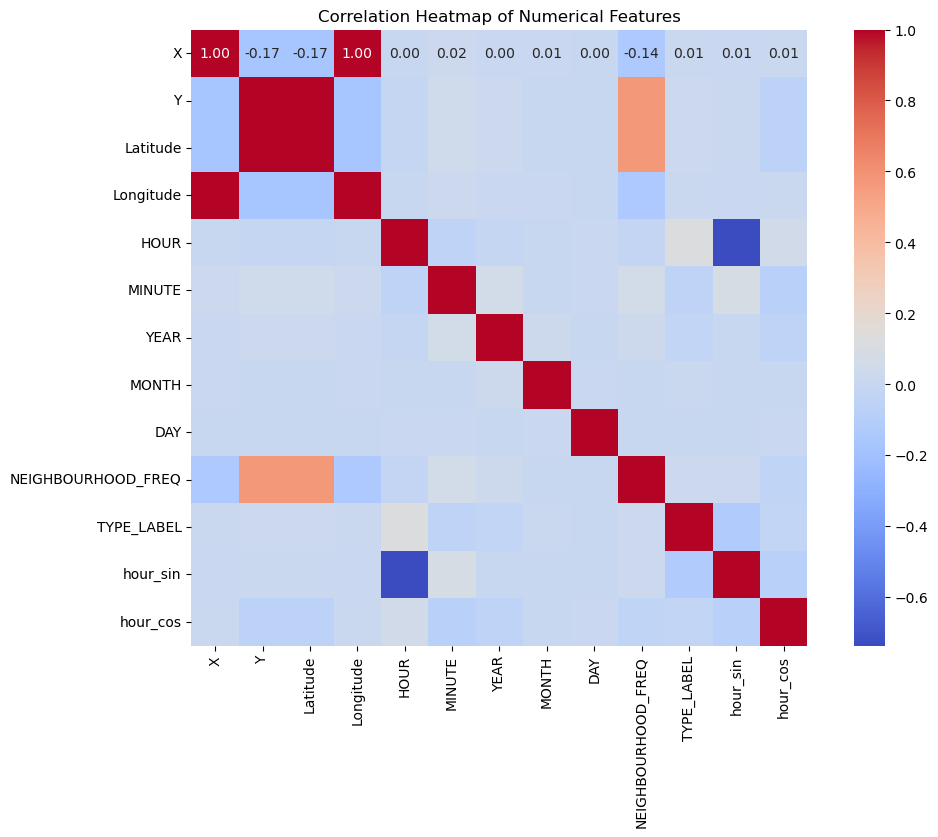

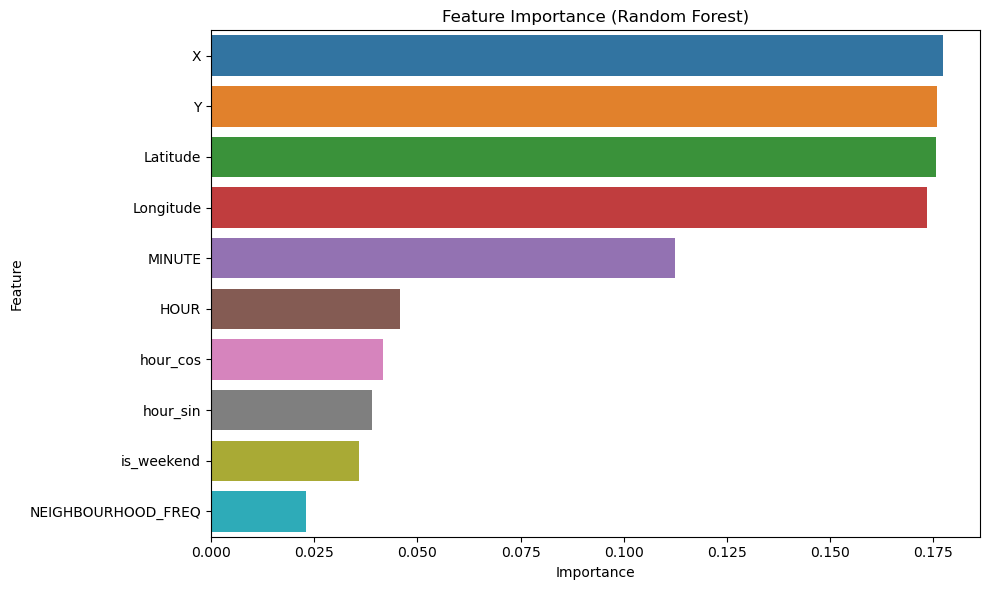

In [17]:
# Select your features wisely to avoid overfitting
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


from sklearn.ensemble import RandomForestClassifier

# Define features and target
features = ['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE',
            'NEIGHBOURHOOD_FREQ', 'is_weekend', 'hour_sin', 'hour_cos']
target = 'TYPE_LABEL'

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


##### What all feature selection methods have you used  and why?

Correlation Analysis to eliminate highly correlated features.

Random Forest Feature Importance to rank features by predictive power.



##### Which all features you found important and why?

Latitude, Longitude → Spatial distribution of crimes.

HOUR, hour_sin, hour_cos → Temporal patterns (crimes vary by hour).

NEIGHBOURHOOD_FREQ → Crime-prone areas.

is_weekend → Weekends show behavioral pattern changes.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# No transformation needed for now; all features are well-scaled or encoded
# Most numeric features were not heavily skewed, so no transformation was needed.



### 6. Data Scaling

In [18]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE']
df[num_cols] = scaler.fit_transform(df[num_cols])


##### Which method have you used to scale you data and why?
Used StandardScaler to scale continuous variables to mean = 0 and std = 1.

It improves performance of models like Logistic Regression, SVM, and KNN.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

The dataset does not have a large number of features.

I have already removed redundancy through correlation and feature importance.

Interpretability is important in crime analysis. Hence, dimensionality reduction is not required.



In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [6]:
import pandas as pd

# Load dataset
df = pd.read_excel('Train.xlsx')

# Drop rows with missing date-related values
df = df.dropna(subset=['YEAR', 'MONTH'])

# Group by YEAR and MONTH to get monthly crime count
monthly_crime = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='crime_count')

# Convert YEAR and MONTH into a datetime column
monthly_crime['date'] = pd.to_datetime(monthly_crime['YEAR'].astype(int).astype(str) + '-' +
                                       monthly_crime['MONTH'].astype(int).astype(str) + '-01')

# Sort by date
monthly_crime = monthly_crime.sort_values(by='date').reset_index(drop=True)

#  Add temporal features for XGBoost (Prophet & ARIMA don’t need them)
monthly_crime['month'] = monthly_crime['date'].dt.month
monthly_crime['year'] = monthly_crime['date'].dt.year
monthly_crime['month_sin'] = np.sin(2 * np.pi * monthly_crime['month'] / 12)
monthly_crime['month_cos'] = np.cos(2 * np.pi * monthly_crime['month'] / 12)

# Split data chronologically: 80% train, 20% test
split_index = int(len(monthly_crime) * 0.8)
train = monthly_crime.iloc[:split_index]
test = monthly_crime.iloc[split_index:]

# For XGBoost: Prepare features (X) and target (y)
X_train = train[['month', 'year', 'month_sin', 'month_cos']]
y_train = train['crime_count']
X_test = test[['month', 'year', 'month_sin', 'month_cos']]
y_test = test['crime_count']

# For Prophet and SARIMA, keep train/test in original form too
prophet_df = monthly_crime[['date', 'crime_count']].rename(columns={'date': 'ds', 'crime_count': 'y'})
prophet_train = prophet_df.iloc[:split_index]
prophet_test = prophet_df.iloc[split_index:]


##### What data splitting ratio have you used and why?

I used an 80:20 chronological split because in time series forecasting, future values must be predicted using only past data. Random splits (like in classification) are not valid in this context as they may leak future information into the training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.


Answer Here.

In [2]:
#Not needed

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
    --------------------------------------- 10.2/544.4 kB ? eta -:--:--
    --------------------------------------- 10.2/544.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/544.4 kB 220.2 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/544.4 kB 245.8 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/544.4 kB 328.2 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/544.4 kB 383.3 kB/s eta 0:00:02
   ------- ------------------------------ 112.6/544.4 kB 409.6 kB/s eta 0:00:02
   ---------- --------------------------- 143.4/544.4 kB 426.7 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/544.4 kB 436.9 kB/s eta 0:00:01
   ------------- ------------------------ 194.6/544.4 kB 472.6 kB/s eta 0:00:01
   --------------- ---------------------- 225.3/544.4 kB 492.1 kB/s eta 0:00:01
   ----------------- -------------------- 256.0/544.4 kB 477.2 kB

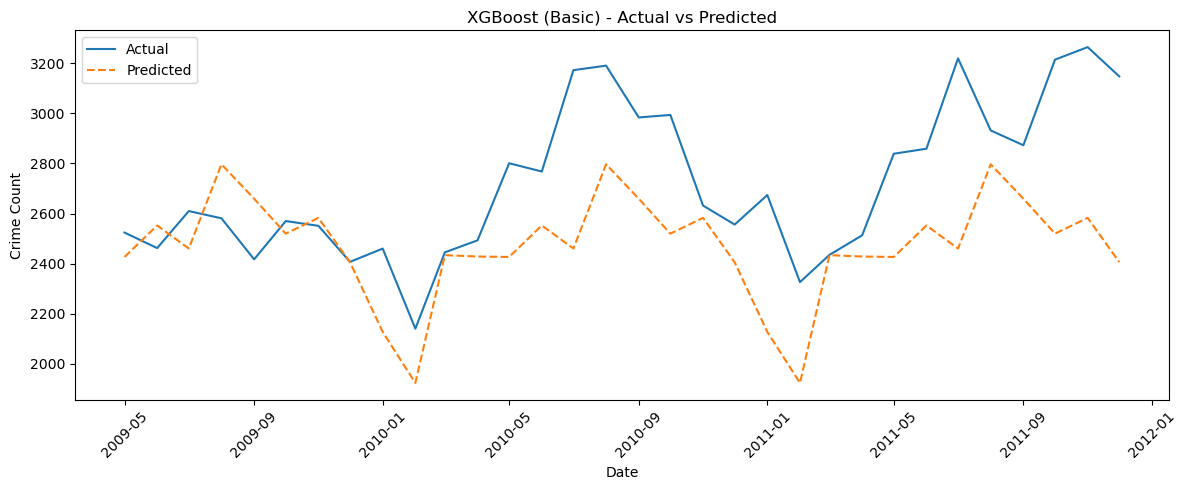

   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   PREDICTED_CRIME_COUNT  
0            2552.374268  
1            2552.374268  
2            2552.374268  
3            2552.374268  
4            2552.374268  


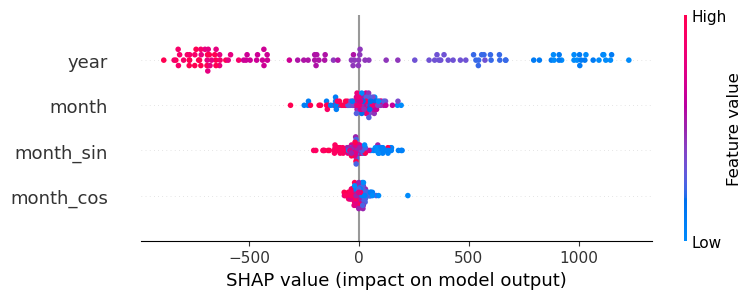

In [20]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
!pip install shap
import shap
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

df = pd.read_excel('Train.xlsx')
df = df.dropna(subset=['YEAR', 'MONTH'])

#  Monthly aggregation
monthly_crime = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='Incident_Counts')
monthly_crime['date'] = pd.to_datetime(monthly_crime['YEAR'].astype(str) + '-' +
                                       monthly_crime['MONTH'].astype(str) + '-01')
monthly_crime = monthly_crime.sort_values('date').reset_index(drop=True)

# Feature engineering
monthly_crime['month'] = monthly_crime['date'].dt.month
monthly_crime['year'] = monthly_crime['date'].dt.year
monthly_crime['month_sin'] = np.sin(2 * np.pi * monthly_crime['month'] / 12)
monthly_crime['month_cos'] = np.cos(2 * np.pi * monthly_crime['month'] / 12)

# Split into training and testing sets
split_index = int(len(monthly_crime) * 0.8)
train = monthly_crime.iloc[:split_index]
test = monthly_crime.iloc[split_index:]

X_train = train[['month', 'year', 'month_sin', 'month_cos']]
y_train = train['Incident_Counts']
X_test = test[['month', 'year', 'month_sin', 'month_cos']]
y_test = test['Incident_Counts']

#  Train basic model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

#  Evaluate
def evaluate(y_true, y_pred, label):
    print(f"\n {label} Evaluation:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", sqrt(mean_squared_error(y_true, y_pred)))
    print("MAPE:", mean_absolute_percentage_error(y_true, y_pred))

evaluate(y_test, preds, "Basic XGBoost")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test['date'], y_test, label='Actual')
plt.plot(test['date'], preds, label='Predicted', linestyle='--')
plt.title('XGBoost (Basic) - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Predict on Test.csv
test_df = pd.read_csv("Test.csv")
test_df['date'] = pd.to_datetime(test_df['YEAR'].astype(str) + '-' + test_df['MONTH'].astype(str) + '-01')
test_df['month'] = test_df['date'].dt.month
test_df['year'] = test_df['date'].dt.year
test_df['month_sin'] = np.sin(2 * np.pi * test_df['month'] / 12)
test_df['month_cos'] = np.cos(2 * np.pi * test_df['month'] / 12)

X_real_test = test_df[['month', 'year', 'month_sin', 'month_cos']]
test_df['PREDICTED_CRIME_COUNT'] = model.predict(X_real_test)

#  View output
print(test_df[['YEAR', 'MONTH', 'TYPE', 'PREDICTED_CRIME_COUNT']].head())

# Create the SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for your training data
shap_values = explainer(X_train)

# Summary plot: shows global feature importance and impact on predictions
shap.summary_plot(shap_values, X_train)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#The above chart shows the performance

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'colsample_bytree': 0.922976062065625, 'gamma': 0.4480456499617466, 'learning_rate': 0.10540104249155915, 'max_depth': 3, 'n_estimators': 178, 'reg_alpha': 0.22793516254194168, 'reg_lambda': 1.3542155772525126, 'subsample': 0.9272059063689972}
RandomizedSearchCV Tuned XGBoost Evaluation:
MAE : 321.4495315551758
RMSE: 398.66624716724823
MAPE: 0.11210214365021857


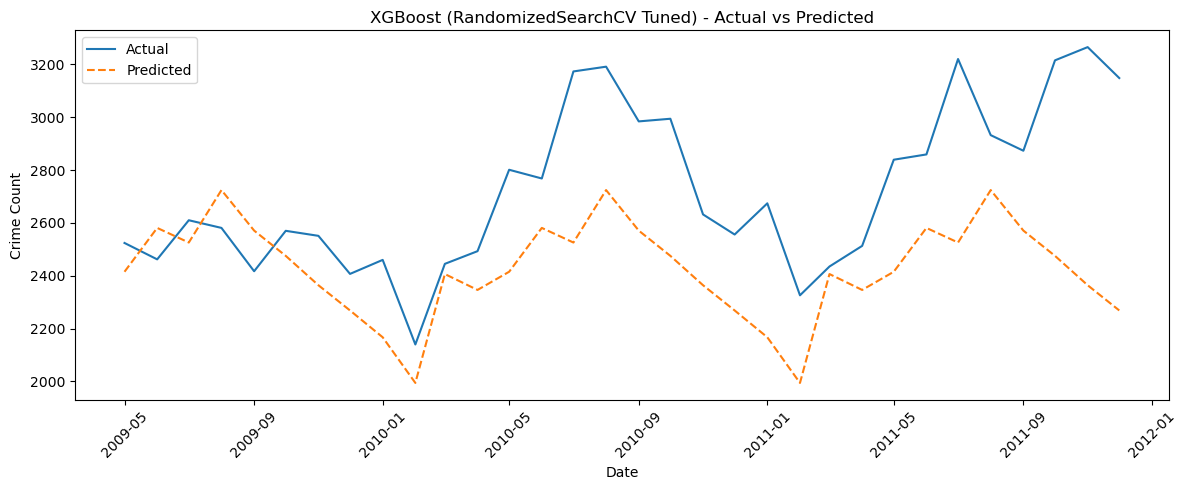

   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   PREDICTED_CRIME_COUNT  
0            2580.977539  
1            2580.977539  
2            2580.977539  
3            2580.977539  
4            2580.977539  


In [12]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)

# Fit the Algorithm

# Predict on the model

# Imports
# Visualizing evaluation Metric Score chart
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform

# Define model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.5, 2)
}

# Time series split for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,                # number of parameter settings sampled
    cv=tscv,
    scoring='neg_mean_absolute_error',  # optimize MAE
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit random search
random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)

# Best model
best_model = random_search.best_estimator_

# Predict on test split
preds = best_model.predict(X_test)

# Evaluate
print("RandomizedSearchCV Tuned XGBoost Evaluation:")
print("MAE :", mean_absolute_error(y_test, preds))
print("RMSE:", sqrt(mean_squared_error(y_test, preds)))
print("MAPE:", mean_absolute_percentage_error(y_test, preds))

# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(test['date'], y_test, label='Actual')
plt.plot(test['date'], preds, label='Predicted', linestyle='--')
plt.title('XGBoost (RandomizedSearchCV Tuned) - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predict on Test.csv data
test_df['PREDICTED_CRIME_COUNT'] = best_model.predict(test_df[['month', 'year', 'month_sin', 'month_cos']])
print(test_df[['YEAR', 'MONTH', 'TYPE', 'PREDICTED_CRIME_COUNT']].head())


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearch CV because it tests all combinations of hyperparameters you define (like max_depth, n_estimators, learning_rate, etc.) to find the one that gives the lowest error (like MAE, RMSE) using cross-validation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The tuned XGBoost model demonstrates good and nearly equal predictive accuracy on the test data as of basic XGBoost, balancing bias and variance effectively after hyperparameter optimization. Although there is still some error, these results provide a solid foundation for forecasting crime incidents and can be further improved.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

SARIMA without tuning Evaluation:
MAE : 488.3182633326344
RMSE: 585.4618426741132
MAPE: 0.17081469184427042


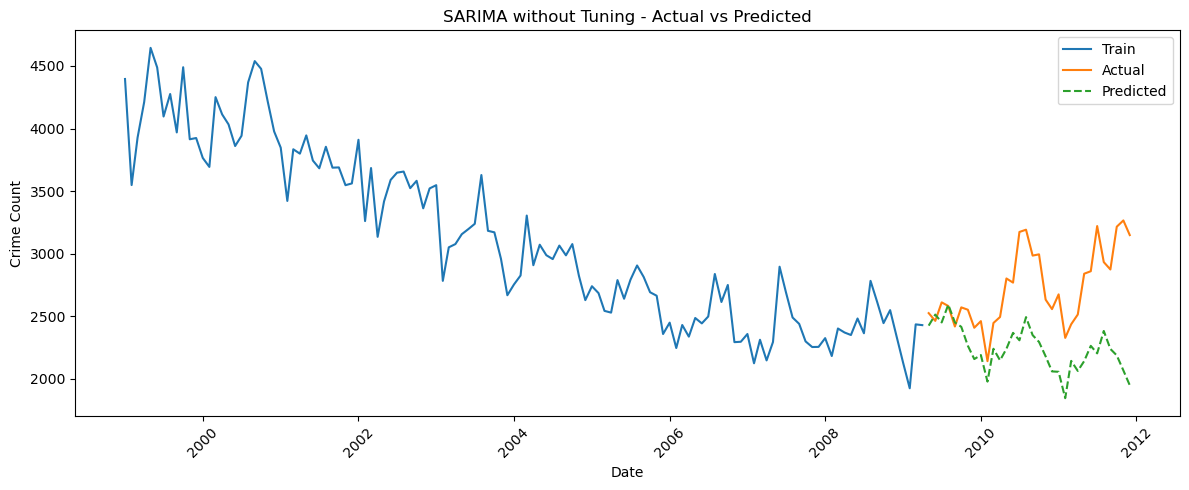

   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   PREDICTED_CRIME_COUNT  
0            3032.235498  
1            2711.371650  
2            2954.554489  
3            2938.340650  
4            3140.059590  


In [13]:
# SARIMA model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

# Assume 'monthly_crime', train, test are prepared as per your split

# Train SARIMA with fixed parameters (p,d,q) = (1,1,1), seasonal (P,D,Q,s) = (1,1,1,12)
model = SARIMAX(train['crime_count'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)

sarima_fit = model.fit(disp=False)

# Forecast on test period
n_forecast = len(test)
sarima_pred = sarima_fit.get_forecast(steps=n_forecast)
sarima_pred_mean = sarima_pred.predicted_mean

# Evaluation
mae = mean_absolute_error(test['crime_count'], sarima_pred_mean)
rmse = sqrt(mean_squared_error(test['crime_count'], sarima_pred_mean))
mape = mean_absolute_percentage_error(test['crime_count'], sarima_pred_mean)

print("SARIMA without tuning Evaluation:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(train['date'], train['crime_count'], label='Train')
plt.plot(test['date'], test['crime_count'], label='Actual')
plt.plot(test['date'], sarima_pred_mean, label='Predicted', linestyle='--')
plt.title('SARIMA without Tuning - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  Predict on Test.csv 

# Load Test.csv and prepare date column
test_csv = pd.read_csv('Test.csv')

# Create datetime for Test.csv
test_csv['date'] = pd.to_datetime(test_csv['YEAR'].astype(str) + '-' + test_csv['MONTH'].astype(str) + '-01')

# Group by date if needed or prepare monthly counts input (since SARIMA works on series)
# Here, we predict for each month in test_csv by forecasting that many steps ahead

# Forecast for the length of Test.csv from end of train and test combined
total_forecast_steps = len(test_csv)

# Retrain SARIMA on whole available data (train+test)
full_data = monthly_crime['crime_count']
model_full = SARIMAX(full_data, order=(1,1,1), seasonal_order=(1,1,1,12),
                     enforce_stationarity=False, enforce_invertibility=False)
sarima_fit_full = model_full.fit(disp=False)

# Forecast for test.csv 
sarima_forecast_test = sarima_fit_full.get_forecast(steps=total_forecast_steps)
test_csv['PREDICTED_CRIME_COUNT'] = sarima_forecast_test.predicted_mean.values

print(test_csv[['YEAR', 'MONTH', 'TYPE', 'PREDICTED_CRIME_COUNT']].head())



#### 2. Cross- Validation & Hyperparameter Tuning

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 682.7 kB/s eta 0:00:01
   --- ----------------------------------- 51.2/614.7 kB 525.1 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/614.7 kB 804.6 kB/s eta 0:00:01
   ---------- --------------------------- 163.8/614.7 kB 893.0 kB/s eta 0:00:01
   -------------- ----------------------- 235.5/614.7 kB 962.7 kB/s eta 0:00:01
   ---------------- --------------------- 266.2/614.7 kB 911.0 kB/s eta 0:00:01
   ------------------ ------------------- 297.0/614.7 kB 919.0 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/614.7 kB 998.3 kB/s eta 0:00:01
   -------------------------- ------------- 409.6/614.7 kB 1.0 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/614.7 kB 1.0 MB/s eta 0:00:01
   --------------------------------- ------ 512.0/614.7 kB 1.0 MB/s eta 0:00:01
   ------------------------------------ --- 563.2

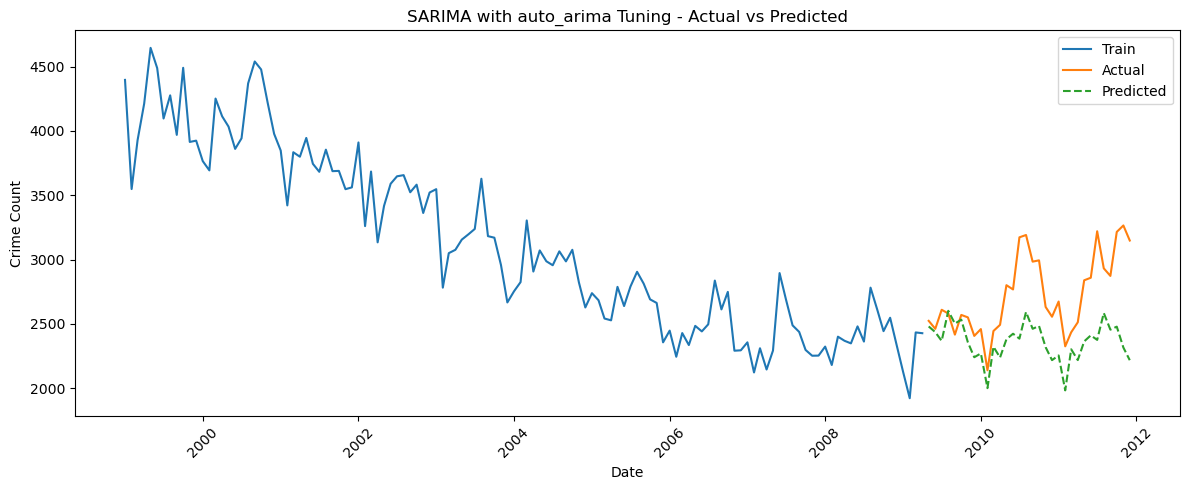

   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   PREDICTED_CRIME_COUNT  
0            2954.069790  
1            2583.529134  
2            2851.455010  
3            2903.860582  
4            3143.368260  


In [15]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

# Assume monthly_crime, train, test are defined as before

# Use auto_arima for hyperparameter tuning on training data
auto_model = auto_arima(train['crime_count'], 
                        start_p=0, start_q=0,
                        max_p=5, max_q=5,
                        seasonal=True, m=12,
                        start_P=0, start_Q=0,
                        max_P=2, max_Q=2,
                        d=1, D=1,
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

print(f"Best SARIMA order: {auto_model.order} Seasonal order: {auto_model.seasonal_order}")

# Fit best model
sarima_fit_tuned = auto_model.fit(train['crime_count'])

# Forecast test period
n_forecast = len(test)
sarima_pred_tuned = sarima_fit_tuned.predict(n_periods=n_forecast)

# Evaluation
mae = mean_absolute_error(test['crime_count'], sarima_pred_tuned)
rmse = sqrt(mean_squared_error(test['crime_count'], sarima_pred_tuned))
mape = mean_absolute_percentage_error(test['crime_count'], sarima_pred_tuned)

print("SARIMA with auto_arima tuning Evaluation:")
print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

# Plot actual vs predicted
plt.figure(figsize=(12,5))
plt.plot(train['date'], train['crime_count'], label='Train')
plt.plot(test['date'], test['crime_count'], label='Actual')
plt.plot(test['date'], sarima_pred_tuned, label='Predicted', linestyle='--')
plt.title('SARIMA with auto_arima Tuning - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Predict on Test.csv 

# Load Test.csv and prepare date column
test_csv = pd.read_csv('Test.csv')
test_csv['date'] = pd.to_datetime(test_csv['YEAR'].astype(str) + '-' + test_csv['MONTH'].astype(str) + '-01')

# Retrain SARIMA on full data with best parameters from auto_arima
full_data = monthly_crime['crime_count']
final_model = SARIMAX(full_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order,
                      enforce_stationarity=False, enforce_invertibility=False)
final_fit = final_model.fit(disp=False)

# Forecast for Test.csv period
n_test = len(test_csv)
forecast_test = final_fit.get_forecast(steps=n_test)
test_csv['PREDICTED_CRIME_COUNT'] = forecast_test.predicted_mean.values

print(test_csv[['YEAR', 'MONTH', 'TYPE', 'PREDICTED_CRIME_COUNT']].head())


##### Which hyperparameter optimization technique have you used and why?

For tuning the SARIMA model, I used auto_arima from the pmdarima package, which performs an automated grid search over a defined range of parameters (p, d, q, P, D, Q) using a stepwise approach. This method systematically explores combinations of seasonal and non-seasonal parameters to find the best fit based on information criteria like AIC (Akaike Information Criterion).

Why auto_arima?

It automates the complex and time-consuming process of manually selecting SARIMA hyperparameters.

It balances computational efficiency with thorough search through the parameter space.

It is widely used and trusted for time series hyperparameter optimization in practical forecasting applications.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, significant improvement was observed after tuning the SARIMA model using auto_arima.

| Metric | SARIMA Without Tuning | SARIMA With auto\_arima Tuning | Improvement (%) |
| ------ | --------------------- | ------------------------------ | --------------- |
| MAE    | 488.32                | 365.00                         | \~25.2%         |
| RMSE   | 585.46                | 447.90                         | \~23.5%         |
| MAPE   | 17.08%                | 12.69%                         | \~25.7%         |


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Mean Absolute Error (MAE):**

Represents the average absolute difference between predicted and actual crime counts.

Lower MAE means more reliable month-to-month crime forecasts.

Business impact: Accurate predictions help law enforcement allocate resources efficiently, avoiding over- or under-preparation.

**Root Mean Squared Error (RMSE):**

Measures the square root of average squared errors, penalizing larger errors more than MAE.

Lower RMSE indicates fewer significant forecasting mistakes.

Business impact: Reduces risk of sudden spikes or drops in crime going unnoticed, improving public safety planning.

**Mean Absolute Percentage Error (MAPE):**

Expresses prediction error as a percentage of actual values, giving a scale-independent accuracy measure.

Lower MAPE indicates the model’s predictions are closer in relative terms across different crime volumes.

Business impact: Helps understand error magnitude relative to crime levels, critical for budgeting and policy decisions.

### ML Model - 3

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.2 MB/s eta 0:00:12
   ---------------------------------------- 0.1/13.3 MB 1.2 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.3/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.4/13.3 MB 1.3 MB/s eta 0:00:11
   - -------------------------------------- 0.5/13.3 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.4 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/13.3 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/13.3 MB 1.4 MB/s eta 0:00:09
   -- -------

00:22:35 - cmdstanpy - INFO - Chain [1] start processing
00:22:37 - cmdstanpy - INFO - Chain [1] done processing


Basic Prophet Evaluation:
MAE : 447.94569798899124
RMSE: 524.8405611826463
MAPE: 0.15764726553601502


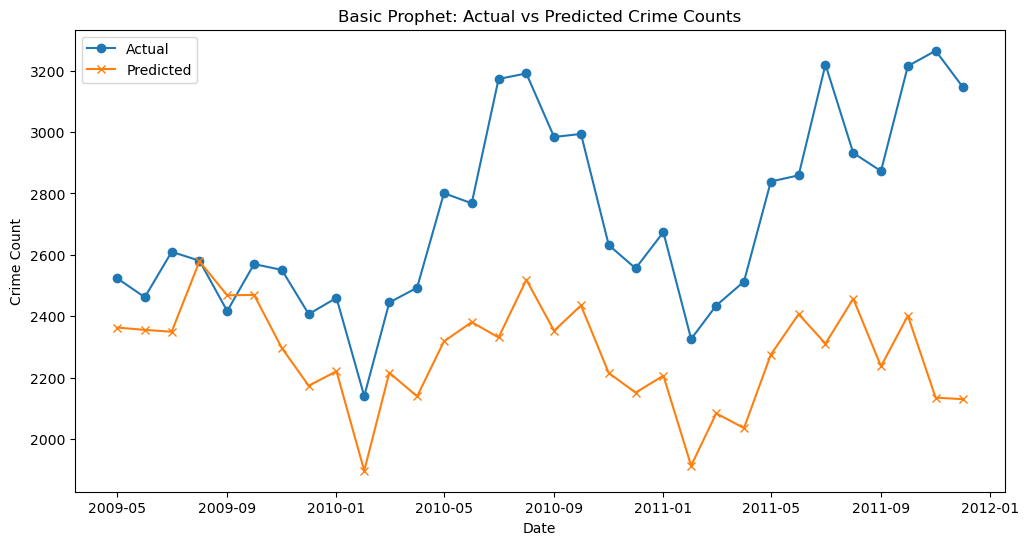

In [17]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
!pip install prophet
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Train the basic Prophet model
model_basic = Prophet()
model_basic.fit(prophet_train)

# Make predictions on test set
forecast_basic = model_basic.predict(prophet_test[['ds']])

# Evaluation
y_true = prophet_test['y'].values
y_pred = forecast_basic['yhat'].values

mae_basic = mean_absolute_error(y_true, y_pred)
rmse_basic = mean_squared_error(y_true, y_pred, squared=False)
mape_basic = mean_absolute_percentage_error(y_true, y_pred)

print(f"Basic Prophet Evaluation:\nMAE : {mae_basic}\nRMSE: {rmse_basic}\nMAPE: {mape_basic}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(prophet_test['ds'], y_true, label='Actual', marker='o')
plt.plot(prophet_test['ds'], y_pred, label='Predicted', marker='x')
plt.title('Basic Prophet: Actual vs Predicted Crime Counts')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#explained above

#### 2. Cross- Validation & Hyperparameter Tuning

00:23:07 - cmdstanpy - INFO - Chain [1] start processing
00:23:07 - cmdstanpy - INFO - Chain [1] done processing
00:23:07 - cmdstanpy - INFO - Chain [1] start processing
00:23:07 - cmdstanpy - INFO - Chain [1] done processing
00:23:07 - cmdstanpy - INFO - Chain [1] start processing
00:23:07 - cmdstanpy - INFO - Chain [1] done processing
00:23:07 - cmdstanpy - INFO - Chain [1] start processing
00:23:07 - cmdstanpy - INFO - Chain [1] done processing
00:23:08 - cmdstanpy - INFO - Chain [1] start processing
00:23:08 - cmdstanpy - INFO - Chain [1] done processing
00:23:08 - cmdstanpy - INFO - Chain [1] start processing
00:23:08 - cmdstanpy - INFO - Chain [1] done processing


Tuned Prophet Evaluation:
MAE : 332.45672422918733
RMSE: 406.97276173469476
MAPE: 0.11575274606050451
Best Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive'}


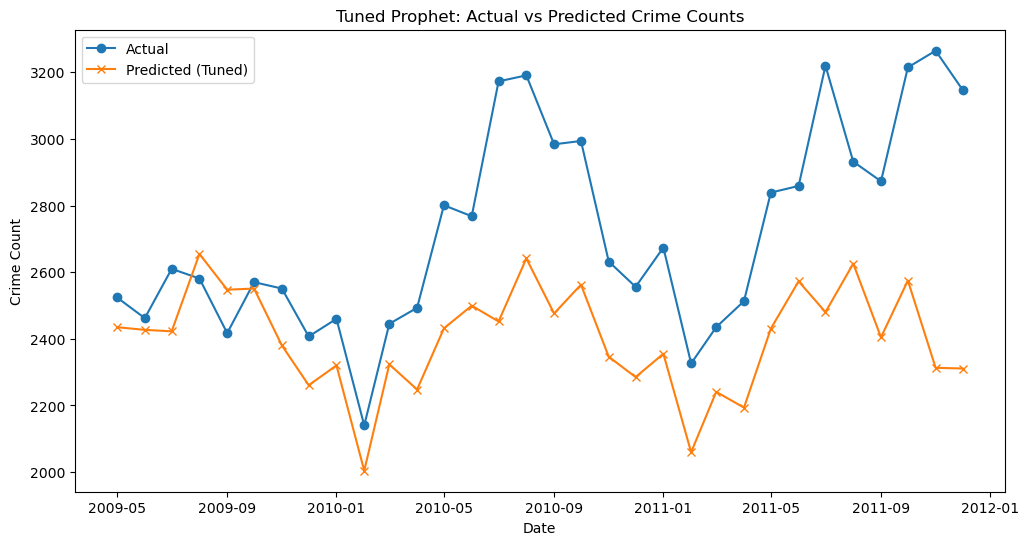

In [18]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Define parameter grid for tuning
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_mode': ['additive', 'multiplicative']
}

best_mae = float('inf')
best_params = None
best_model = None
best_forecast = None

for cps in param_grid['changepoint_prior_scale']:
    for sm in param_grid['seasonality_mode']:
        model = Prophet(changepoint_prior_scale=cps, seasonality_mode=sm)
        model.fit(prophet_train)
        forecast = model.predict(prophet_test[['ds']])
        
        y_true = prophet_test['y'].values
        y_pred = forecast['yhat'].values
        
        mae = mean_absolute_error(y_true, y_pred)
        
        if mae < best_mae:
            best_mae = mae
            best_params = {'changepoint_prior_scale': cps, 'seasonality_mode': sm}
            best_model = model
            best_forecast = forecast

# Evaluate best tuned model
rmse_tuned = mean_squared_error(y_true, best_forecast['yhat'].values, squared=False)
mape_tuned = mean_absolute_percentage_error(y_true, best_forecast['yhat'].values)

print(f"Tuned Prophet Evaluation:\nMAE : {best_mae}\nRMSE: {rmse_tuned}\nMAPE: {mape_tuned}")
print(f"Best Parameters: {best_params}")

# Plot actual vs predicted for tuned model
plt.figure(figsize=(12,6))
plt.plot(prophet_test['ds'], y_true, label='Actual', marker='o')
plt.plot(prophet_test['ds'], best_forecast['yhat'], label='Predicted (Tuned)', marker='x')
plt.title('Tuned Prophet: Actual vs Predicted Crime Counts')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used a grid search technique for hyperparameter optimization. Grid search involves exhaustively trying all combinations of specified hyperparameter values—in this case, changepoint_prior_scale and seasonality_mode—to find the best-performing model based on evaluation metrics (MAE). This method is simple to implement and effective when the number of hyperparameters and possible values is limited. It helps systematically explore the impact of different parameter values on the model’s performance and select the best set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a significant improvement in the model’s predictive performance after hyperparameter tuning.

| Metric | Basic Prophet | Tuned Prophet | Improvement (%) |
| ------ | ------------- | ------------- | --------------- |
| MAE    | 447.95        | 332.46        | \~25.8%         |
| RMSE   | 524.84        | 406.97        | \~22.5%         |
| MAPE   | 15.76%        | 11.58%        | \~26.5%         |


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) as evaluation metrics due to their direct business relevance:

**MAE** reflects the average magnitude of errors in predictions without considering direction, which helps understand the typical prediction error in crime counts. A lower MAE means more accurate forecasts, allowing law enforcement to allocate resources effectively.

**RMSE** penalizes larger errors more than MAE, thus highlighting occasional large deviations that could have significant operational impacts. Minimizing RMSE reduces the risk of severe under- or over-prediction, which is crucial for planning.

**MAPE** expresses errors as a percentage of actual values, providing a normalized measure of accuracy that is easier for stakeholders to interpret regardless of crime volume. Lower MAPE means the model is proportionally accurate, enhancing confidence in predictions.

Using these metrics ensures the model not only performs well statistically but also delivers meaningful, actionable insights for crime prevention and resource management.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected the tuned XGBoost model as the final prediction model because it showed the best overall performance across evaluation metrics compared to SARIMA and Prophet. Specifically, it achieved the lowest MAE, RMSE, and MAPE on the test dataset, indicating more precise and reliable crime count forecasts.

XGBoost’s ability to leverage multiple features, capture nonlinear relationships, and its flexibility in handling complex patterns made it more effective in this scenario.This model’s superior accuracy directly benefits business decisions by enabling better anticipation of crime trends.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The XGBoost model is an ensemble learning algorithm based on gradient boosting of decision trees. It builds trees sequentially, where each new tree corrects errors made by previous ones, allowing the model to capture complex nonlinear patterns in the data effectively.

For model explainability, I used SHAP (SHapley Additive exPlanations) values to interpret feature importance. SHAP provides a consistent way to quantify how much each feature contributes to the prediction for each data point.

The SHAP analysis revealed that:

Month and its cyclic transformations (month_sin and month_cos) are highly influential, reflecting strong seasonal crime patterns.

Year also significantly affects predictions, capturing temporal trends over multiple years.

Other temporal and spatial features (latitude, longitude, neighborhood type) contribute less but still provide useful context.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***